# Lead-scoring-case-study

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

<div style="text-align: center;">
    <img src="Lead Conversion Image.jpg" alt="Lead Conversion Diagram" width="300">
</div>

As we can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, we need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed us to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

We will solve this problem by building a logistic regression model, and assigning the lead score for a lead as $ 100 * p $ where $ p $ is the probability of the lead to convert. By assigning a suitable threshold we will classify whether a lead will convert or not adhering to the expectations provided by CEO and ensuring a robust model which will scale well in the future.

### We will start by importing the necessary libraries and the data

In [183]:
import numpy as np # for data wrangling and preprocessing
import pandas as pd # for data wrangling and preprocessing
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
import warnings # for aesthetic presentation so that warnings don't clutter the output
from sklearn.model_selection import train_test_split # to split the data into train and test sets
from sklearn.preprocessing import StandardScaler # Scaling the data as logistic regression is effected by data which is not standard normally distributed
from sklearn.linear_model import LogisticRegression # required for RFE
from sklearn.feature_selection import RFE # to select a few significant variables and avoid model complexity
import statsmodels.api as sm # for the model building
from statsmodels.stats.outliers_influence import variance_inflation_factor # For identifying highly correlated variables
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve # metrics to evaluate model performance 

warnings.filterwarnings('ignore')

Lets have a look at the data

In [184]:
data = pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [185]:
data.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

From the description above and ny refering to the data dictionary, we can conclude that the target variable is <b>Converted</b>

From the table above we can see that there are significant null values in the data. To handle null values and check for any repeated values, lets proceed to the next section, Preliminary Data Cleaning

# Preliminary Data Cleaning

Let us start this section by defining a function which will show us which columns have null values above a specific percentage

In [187]:
def null_perc(data: pd.DataFrame, perc):
    return data.isnull().mean()[data.isnull().mean() * 100 > perc] * 100 
# data.isnull().mean() returns a dataframe with the amount of null values. We multiply it by 100 to see the percentages with clarity 

## Strategy for Handling null values

- We will treat placeholder terms as null values, as they provide the same type of information.
- We will <b>drop</b> those columns which have <b>more than 40%</b> null values.
- Our end goal is to make a ML model. As such we have no prior information on how the different variables affect the target variable. Hence, we will <b>replace all null values with <em>'Not Specified'</em></b>. This strategy will be followed for the columns having null values <b>between 5% and 40%</b>.
- If for a column, we have <b>less than 5%</b> null values, we will <b>drop the entries, not the column</b>.
- If a column stands out to be <b>not providing information</b>, we will <b>drop</b> the column.

Lets start by looking for columns which have more than 40% null values.

In [188]:
null_perc(data=data, perc=40)

Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
dtype: float64

As per our strategy we will drop these columns

In [189]:
data_1 = data.drop(data.isnull().mean()[data.isnull().mean() * 100 > 40].index, axis=1)
null_perc(data_1, 40) # Checking to see if the drop worked

Series([], dtype: float64)

Now lets handle the columns which have more than 5% but less than 40% null values

In [190]:
null_perc(data=data_1, perc=5)

Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Profile                                     29.318182
City                                             15.367965
dtype: float64

We will go over these columns one-by-one and apply our strategy. we will look at the unique elements to identify the placeholder terms

### Country

In [191]:
data_1['Country'].value_counts(normalize=True)

Country
India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vi

As we can see the column has a majority of entries as India, and hence doesn't provide information. Hence we will drop this column   

In [192]:
data_1.drop(columns='Country', inplace=True)

In [193]:
'Country' in data_1.columns # Checking if drop was successful

False

### Specialization

In [194]:
data_1['Specialization'].value_counts(normalize=True)

Specialization
Select                               0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Travel and Tourism                   0.026019
Media and Advertising                0.026019
International Business               0.022815
Healthcare Management                0.020379
Hospitality Management               0.014612
E-COMMERCE                           0.014355
Retail Management                    0.012817
Rural and Agribusiness               0.009357
E-Business                           0.007306
Services Excellence                  0.005127
Name: proportion, dtype: float64

We have identified a placeholder term, 'Select'. It is most probably the first dropdown option for a field of entry. Hence we can replace these terms as per our strategy, while filling the null entries as 'Not Specified' as well.

In [195]:
data_1['Specialization'].fillna('Not Specified', inplace=True)

In [196]:
data_1['Specialization'].value_counts(normalize=True) # Checking to see if the null values were filled

Specialization
Select                               0.210173
Not Specified                        0.155628
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: proportion, dtype: float64

In [197]:
data_1['Specialization'].replace('Select', 'Not Specified', inplace=True) # replacing placeholder terms
data_1['Specialization'].value_counts(normalize=True) # checking the replacement

Specialization
Not Specified                        0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: proportion, dtype: float64

### How did you hear about X Education

In [198]:
data_1['How did you hear about X Education'].value_counts(normalize=True)

How did you hear about X Education
Select                   0.717048
Online Search            0.114887
Word Of Mouth            0.049481
Student of SomeSchool    0.044078
Other                    0.026447
Multiple Sources         0.021612
Advertisements           0.009953
Social Media             0.009527
Email                    0.003697
SMS                      0.003270
Name: proportion, dtype: float64

As per our strategy, null values and placeholders are same. 'Select' is a placeholder term. Hence this column has approx. 72% null values. Hence this column must be dropped. 

In [199]:
data_1.drop(columns='How did you hear about X Education', inplace=True)
'How did you hear about X Education' in data_1.columns # Checking to see if the column was dropped

False

### What is your current occupation

In [200]:
data_1['What is your current occupation'].value_counts(normalize=True)

What is your current occupation
Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: proportion, dtype: float64

We will fill null values with 'Not Specified'

In [201]:
data_1['What is your current occupation'].fillna('Not Specified', inplace=True)
data_1['What is your current occupation'].value_counts(normalize=True) # Checking

What is your current occupation
Unemployed              0.606061
Not Specified           0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: proportion, dtype: float64

### What matters most to you in choosing a course

In [202]:
data_1['What matters most to you in choosing a course'].value_counts(normalize=True)

What matters most to you in choosing a course
Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: proportion, dtype: float64

This column has almost the same entry, which is 'Better Career Prospects'. As this column is not providing any significant information, we will drop it

In [203]:
data_1.drop(columns='What matters most to you in choosing a course', inplace=True)
'What matters most to you in choosing a course' in data_1.columns # Checking

False

### Tags

In [204]:
data_1['Tags'].value_counts(normalize=True)

Tags
Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in 

We will fill the null values with 'Not Specified'.

In [205]:
data_1['Tags'].fillna('Not Specified', inplace=True)

In [206]:
data_1['Tags'].value_counts(normalize=True) # Checking 

Tags
Not Specified                                        0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
num

### Lead Profile

In [207]:
data_1['Lead Profile'].value_counts(normalize=True)

Lead Profile
Select                         0.634819
Potential Lead                 0.246976
Other Leads                    0.074567
Student of SomeSchool          0.036901
Lateral Student                0.003675
Dual Specialization Student    0.003062
Name: proportion, dtype: float64

The placeholder term 'Select', which is effectively a null value, is making up about 63% of the entries. As per our strategy of dropping columns with null values greater than 40%, we will drop this column

In [208]:
data_1.drop(columns='Lead Profile', inplace=True)
'Lead Profile' in data_1.columns

False

### City

In [209]:
data_1['City'].value_counts(normalize=True)

City
Mumbai                         0.412020
Select                         0.287596
Thane & Outskirts              0.096164
Other Cities                   0.087724
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: proportion, dtype: float64

In this column, we can see that most of the students are either from Mumbai or some other city of Maharashtra. If we change the column to 'State', with majority entries 'Maharashtra', we will end up making up around 95% of the entries, which will be dropped due to lack of information of the column. As such, the 'City' column provides no additional information and must be dropped.

In [210]:
data_1.drop(columns='City', inplace=True)
'City' in data_1.columns

False

All columns with null values greater than 5% have been handled. Lets look at the remaining null values.

In [211]:
null_perc(data=data_1, perc=0)

Lead Source             0.389610
TotalVisits             1.482684
Page Views Per Visit    1.482684
Last Activity           1.114719
dtype: float64

We will drop these null entries as they are very few in number.

In [212]:
data_1.dropna(inplace=True)
null_perc(data=data_1, perc=0) # checking

Series([], dtype: float64)

Finally, lets check for duplicate entries in the data

In [213]:
data_1[data_1.duplicated() == True]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


As no duplicate entries are present, we can conclude our preliminary data cleaning. Lets move on to the next section, exploratory data analysis.

# Exploratory Data Analysis (EDA)

In this section, we will analyze each column and try to identify any patterns in the data which can help us in reducing the complexity of the model. This section also involves some cleaning as we will identify some redundant columns and drop them. We will also perform some sanity checks via visualizing the data.

First, lets store our data in a new variable so that referring to it is convenient.

In [214]:
leads = data_1.copy()

Lets take a look at the columns and general outline of the data after its preliminary cleaning. 

In [215]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [216]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


We can see that the Prospect ID and Lead Number are just indexing columns, and hence we will drop them.

In [217]:
leads.drop(columns=['Prospect ID', 'Lead Number'], inplace=True)
leads.head() # Checking

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Specified,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


Now, we will separate the columns into numeric and categoric so that analysis is convenient

In [218]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [219]:
numeric_columns = list(leads.select_dtypes(include='number').columns) # Selecting columns which are numeric in nature.
numeric_columns

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [220]:
leads[numeric_columns].head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0.0,0,0.0
1,0,5.0,674,2.5
2,1,2.0,1532,2.0
3,0,1.0,305,1.0
4,1,2.0,1428,1.0


In [221]:
categorical_columns = list(leads.select_dtypes(exclude='number').columns) # Selecting those columns which are not numeric in nature
categorical_columns

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

As we know, the 'Converted' variable shows us that whether a lead is converted or not. Hence it is a categorical variable. Thus we will remove it from the numerical variables and append it to the categorical columns. 

In [222]:
categorical_columns.append('Converted') # Adding converted to the categorical columns
categorical_columns

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity',
 'Converted']

In [223]:
numeric_columns.remove('Converted') # removing 'Converted' from numeric columns
numeric_columns

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

### Outlier Analysis

We will plot boxplots to analyze the outliers in the numerical data. 

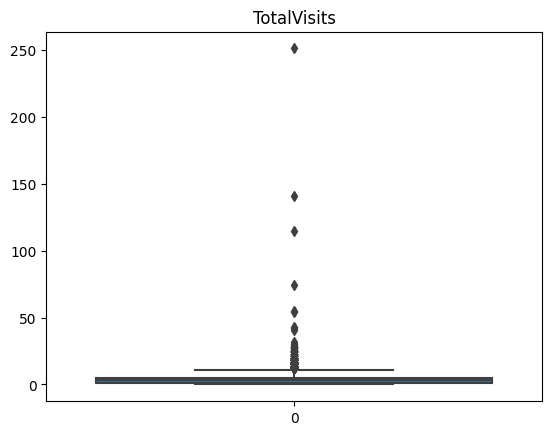

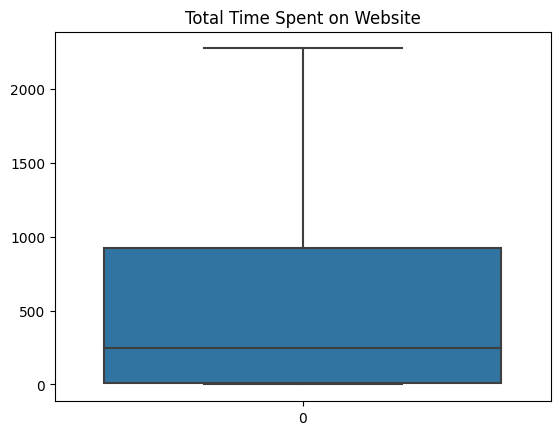

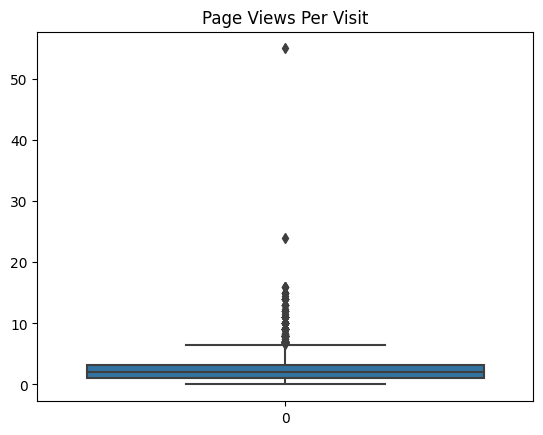

In [224]:
for column in numeric_columns:
    sns.boxplot(data=leads[column])
    plt.title(column)
    plt.show()

#### Strategy for Handling Outliers

We will handle outliers by <b>capping</b> them.

In [225]:
# Defining a function to calculate upper-fence of data

def upper_fence(data, column):
    
    q1 = data[column].describe()["25%"] # Lower quartile
    q3 = data[column].describe()["75%"] # Upper quartile
    iqr = q3 - q1 #inter-quartile range
    return q3 + (iqr * 1.5)  #upper-fence value

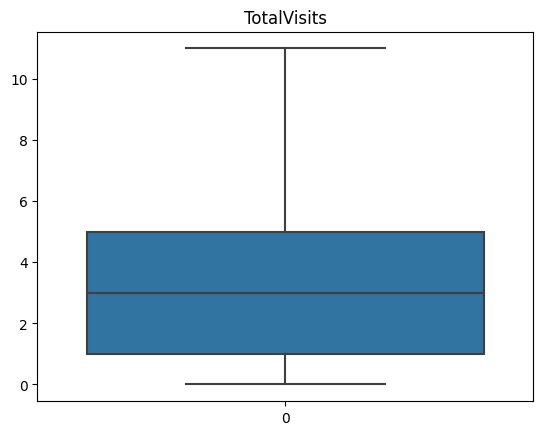

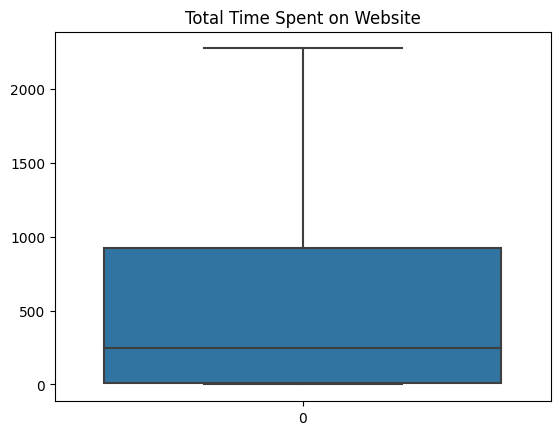

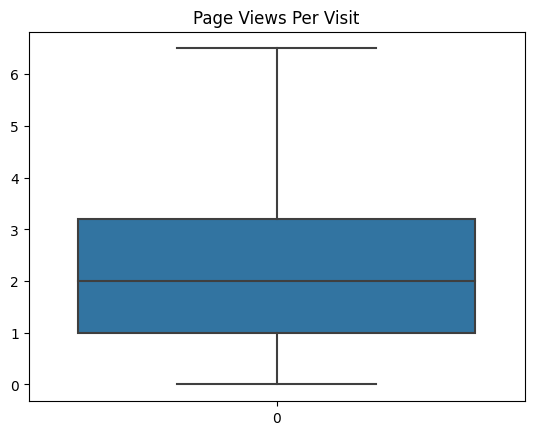

In [226]:
# Capping the data via loop on the numeric columns and plotting boxplots to verify

for column in numeric_columns:
    upper_fence_column = upper_fence(leads, column)
    leads.loc[leads[column] >= upper_fence_column, column] = upper_fence_column
    sns.boxplot(data=leads[column])
    plt.title(column)
    plt.show()

## Univariate Analysis

### Continuous Variable Analysis

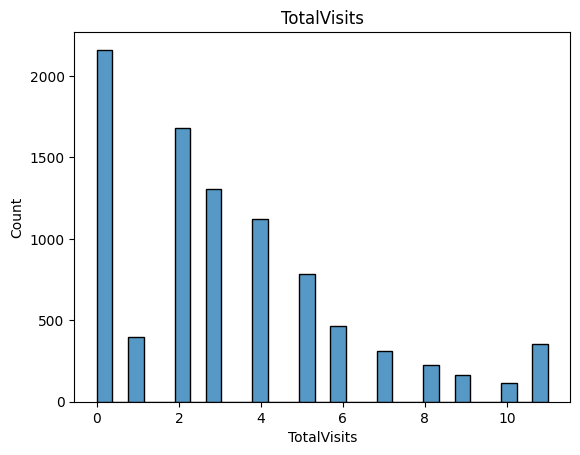

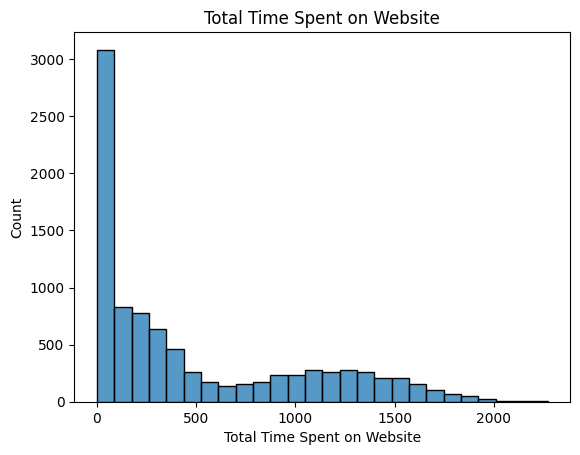

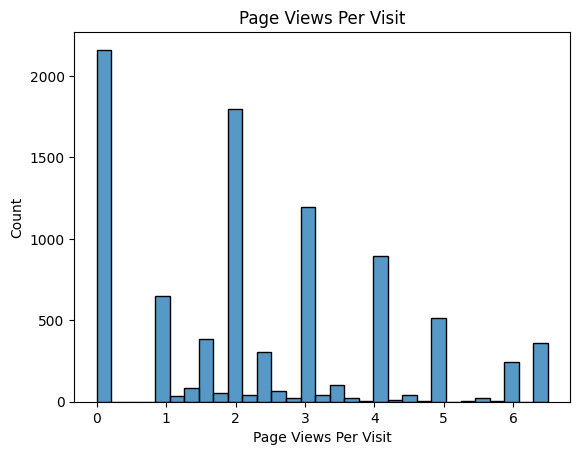

In [227]:
for column in numeric_columns:
    sns.histplot(data=leads[column])
    plt.title(column)
    plt.show()

#### Insight

- From all the figures we can see that most of the entries are nearing zero. Hence many people do not spend much time on the website.
- Due to the above reason, these variables might not be good predictors for the target variable.

### Caregorical Variable Analysis

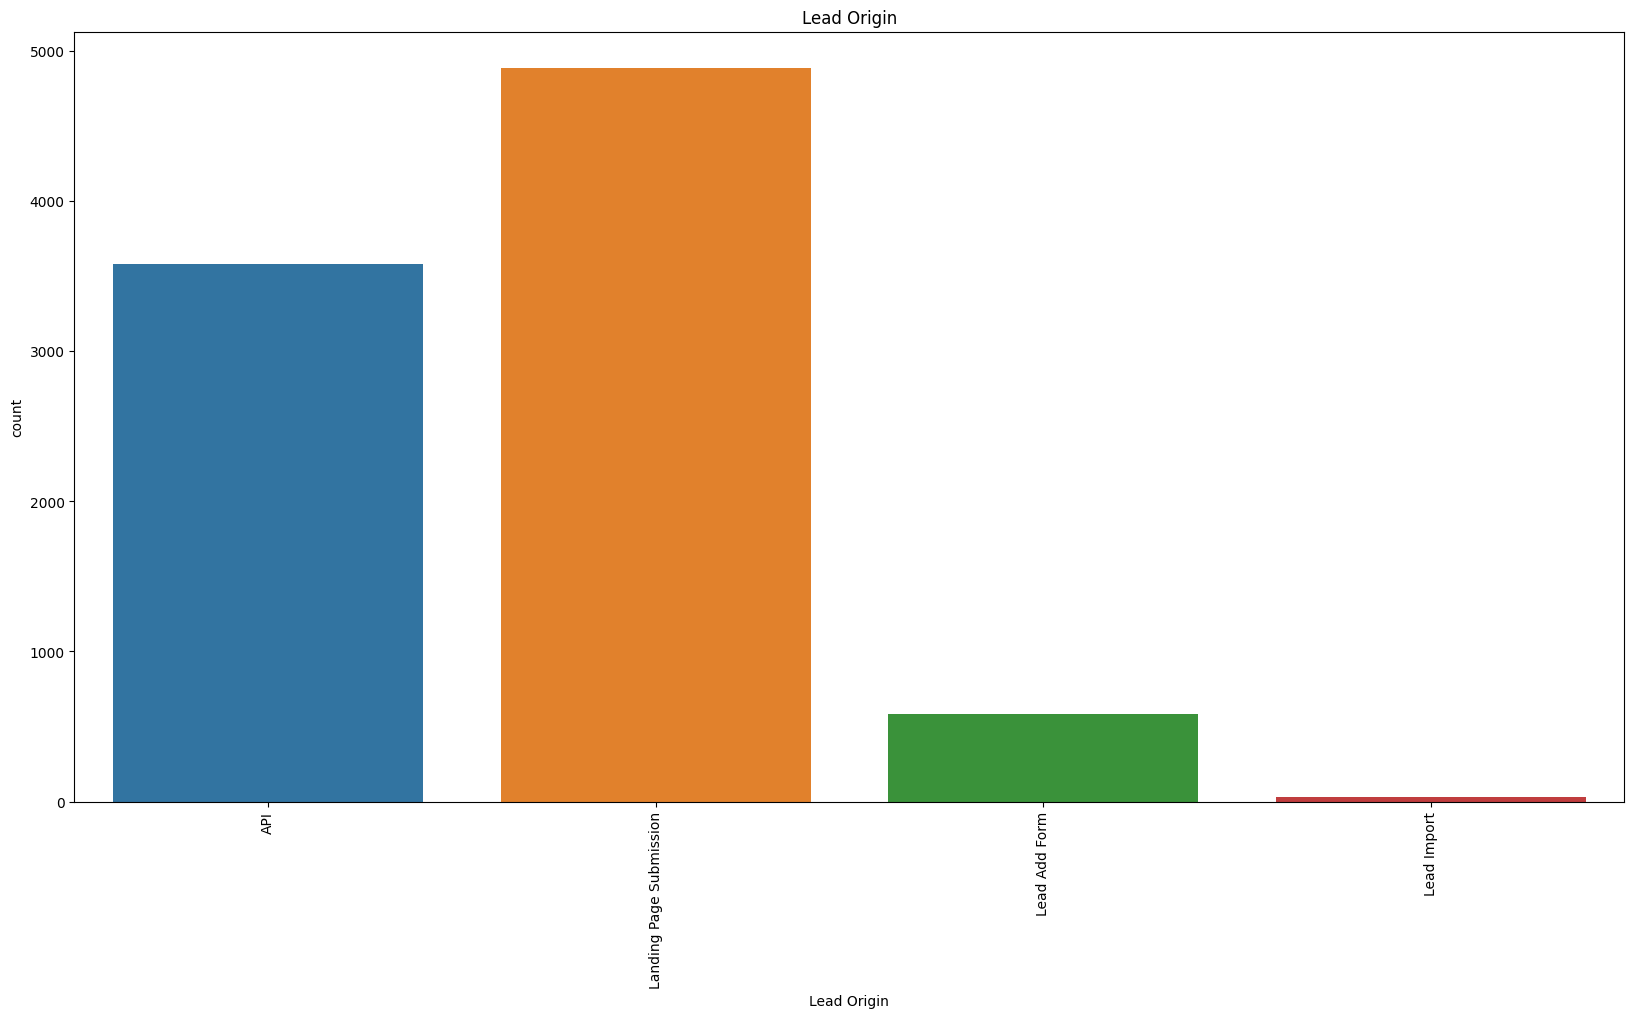

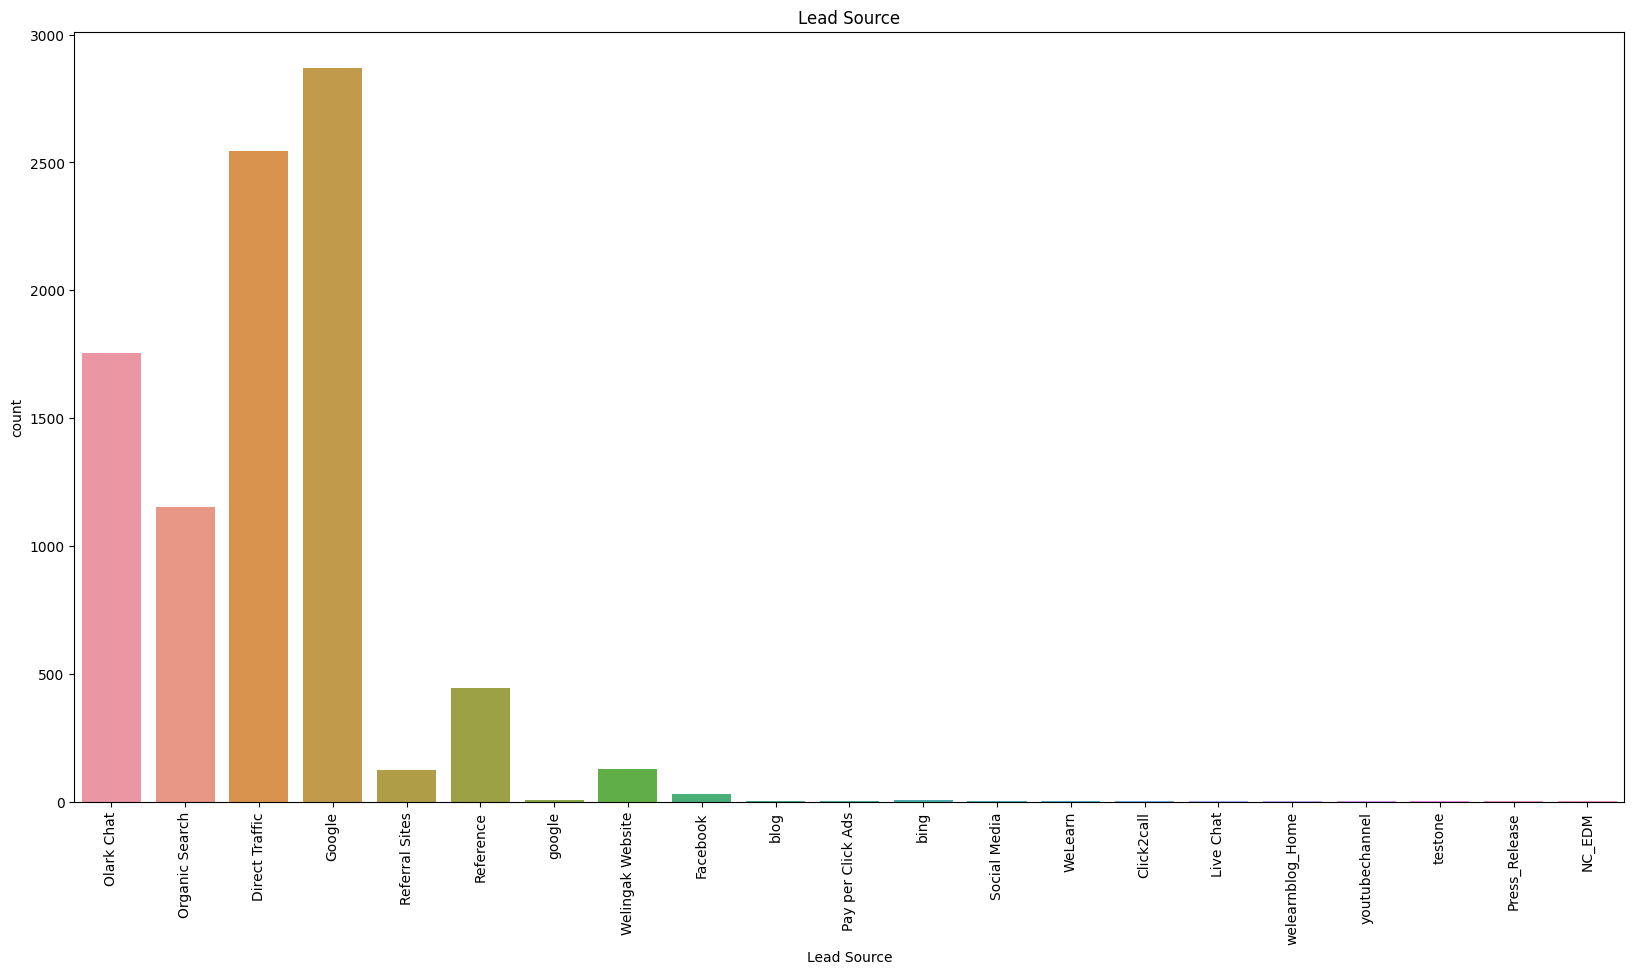

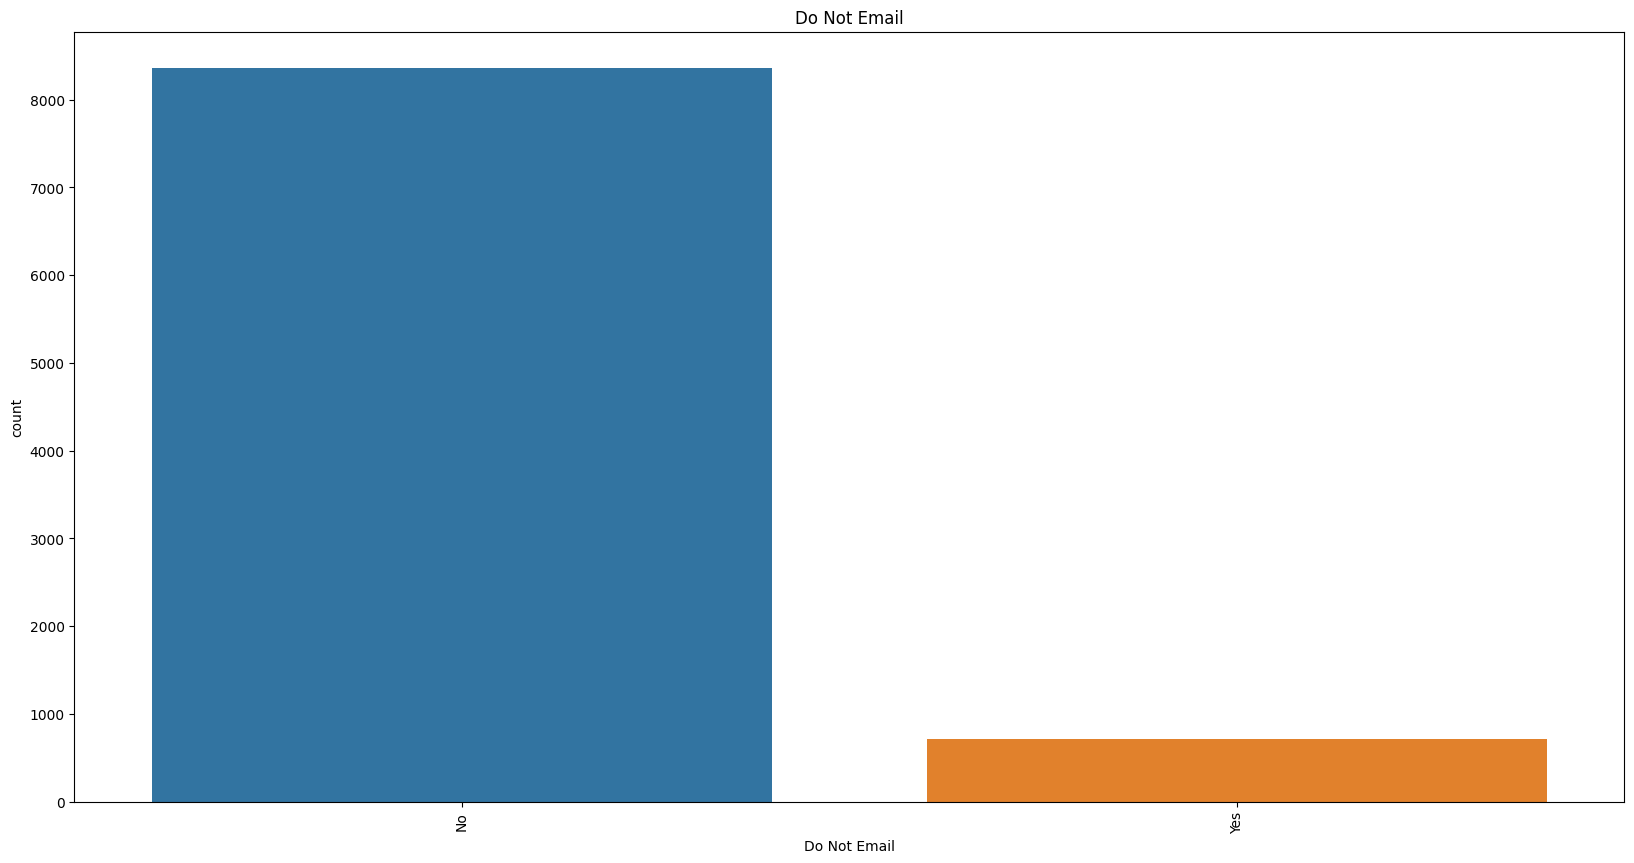

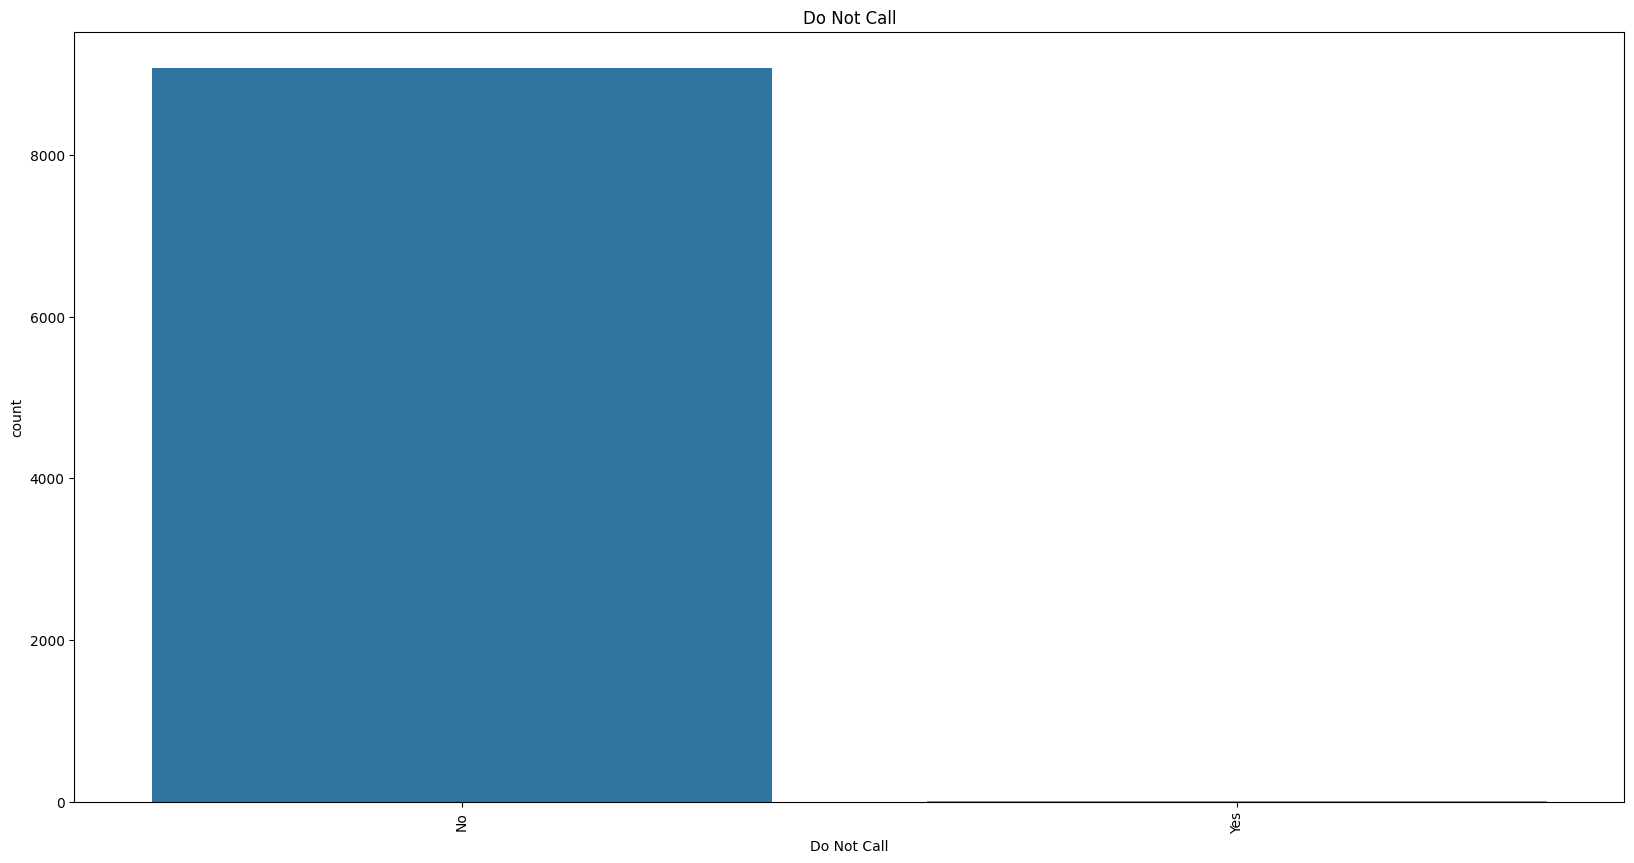

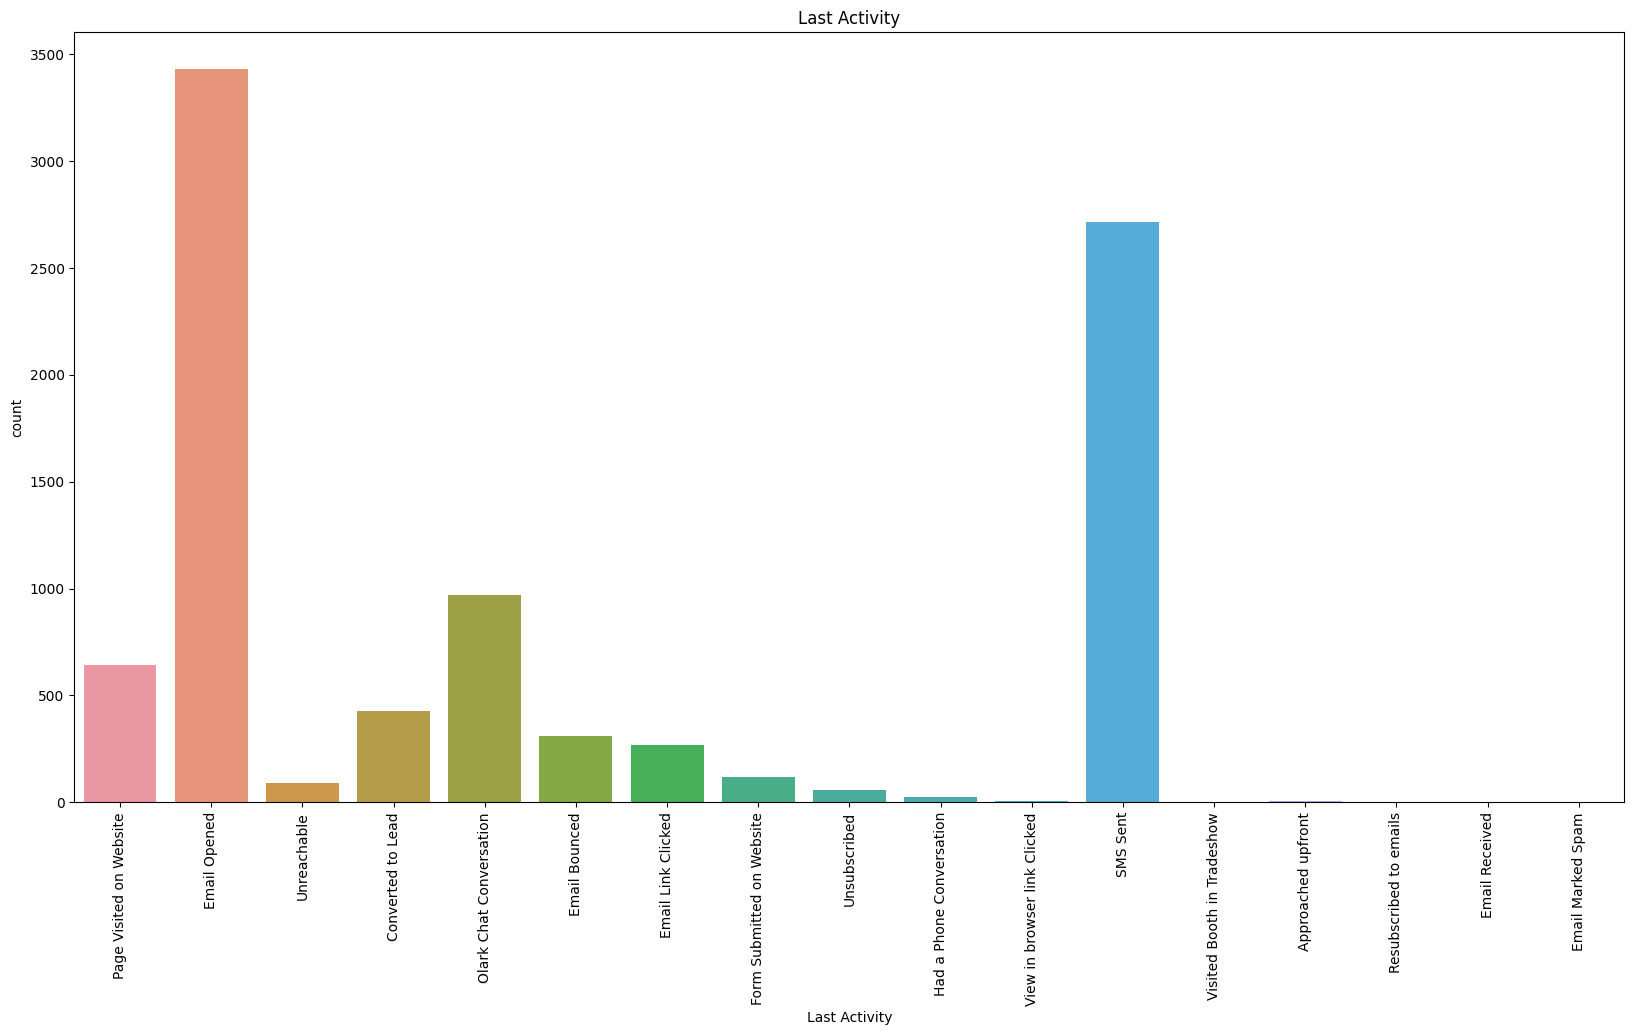

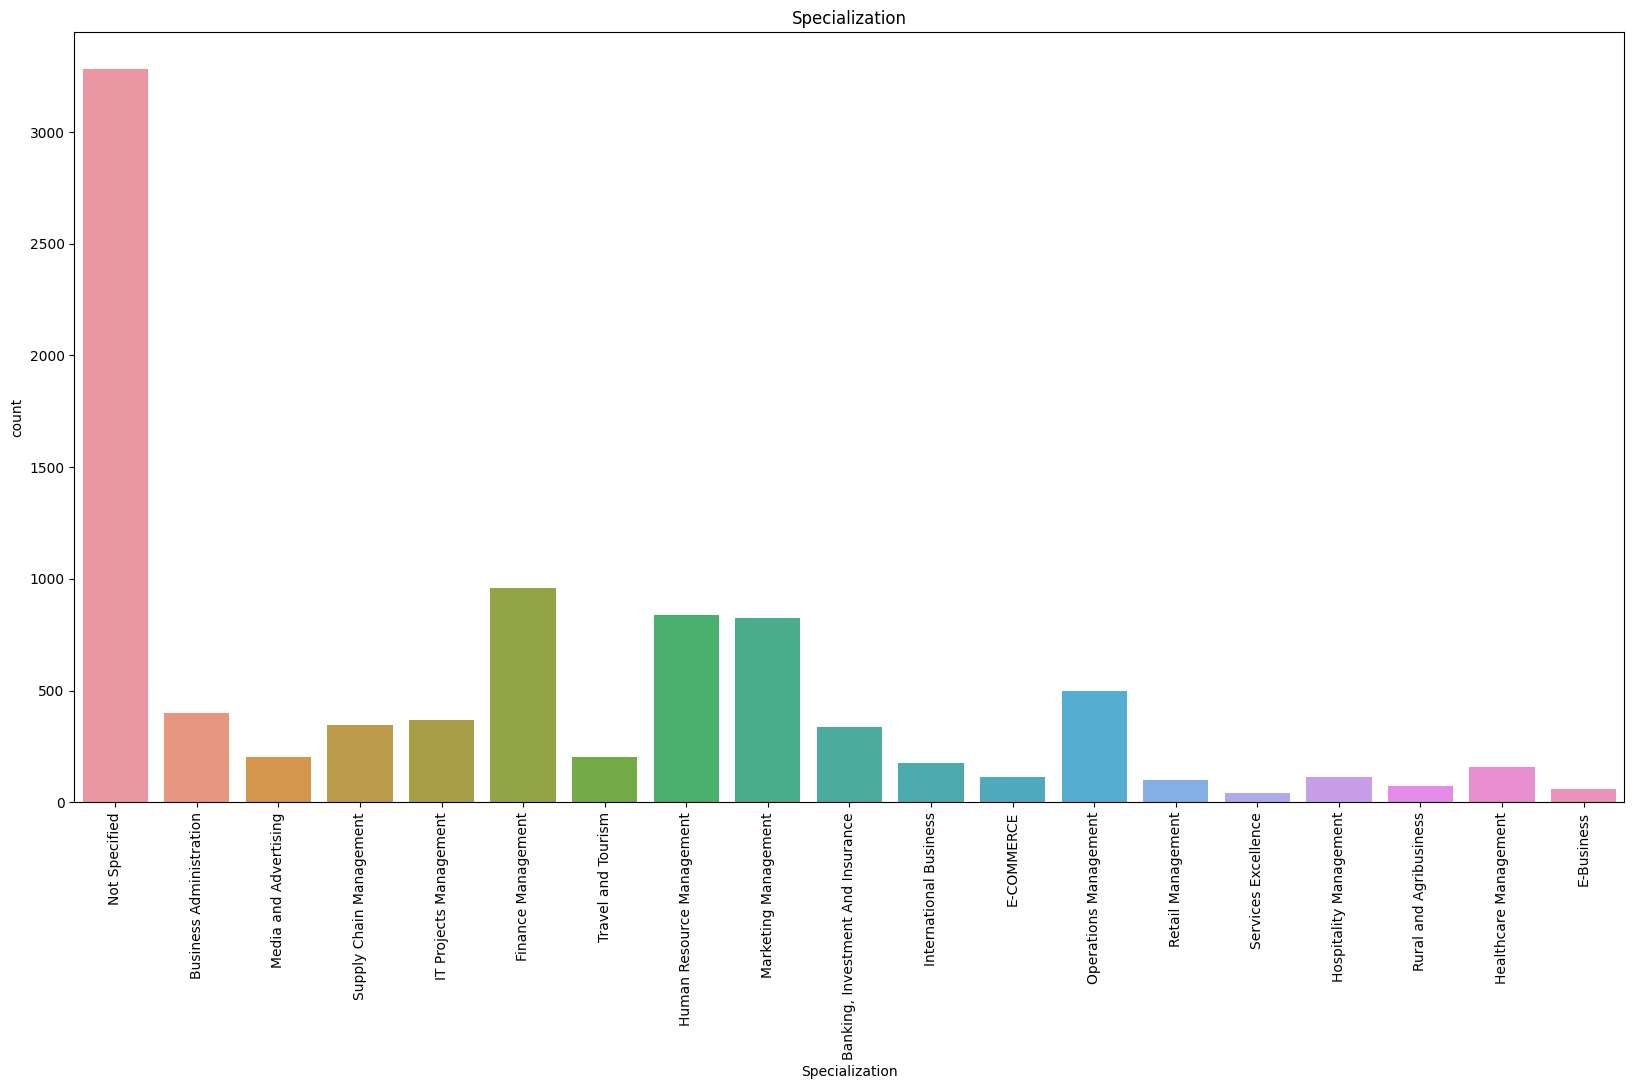

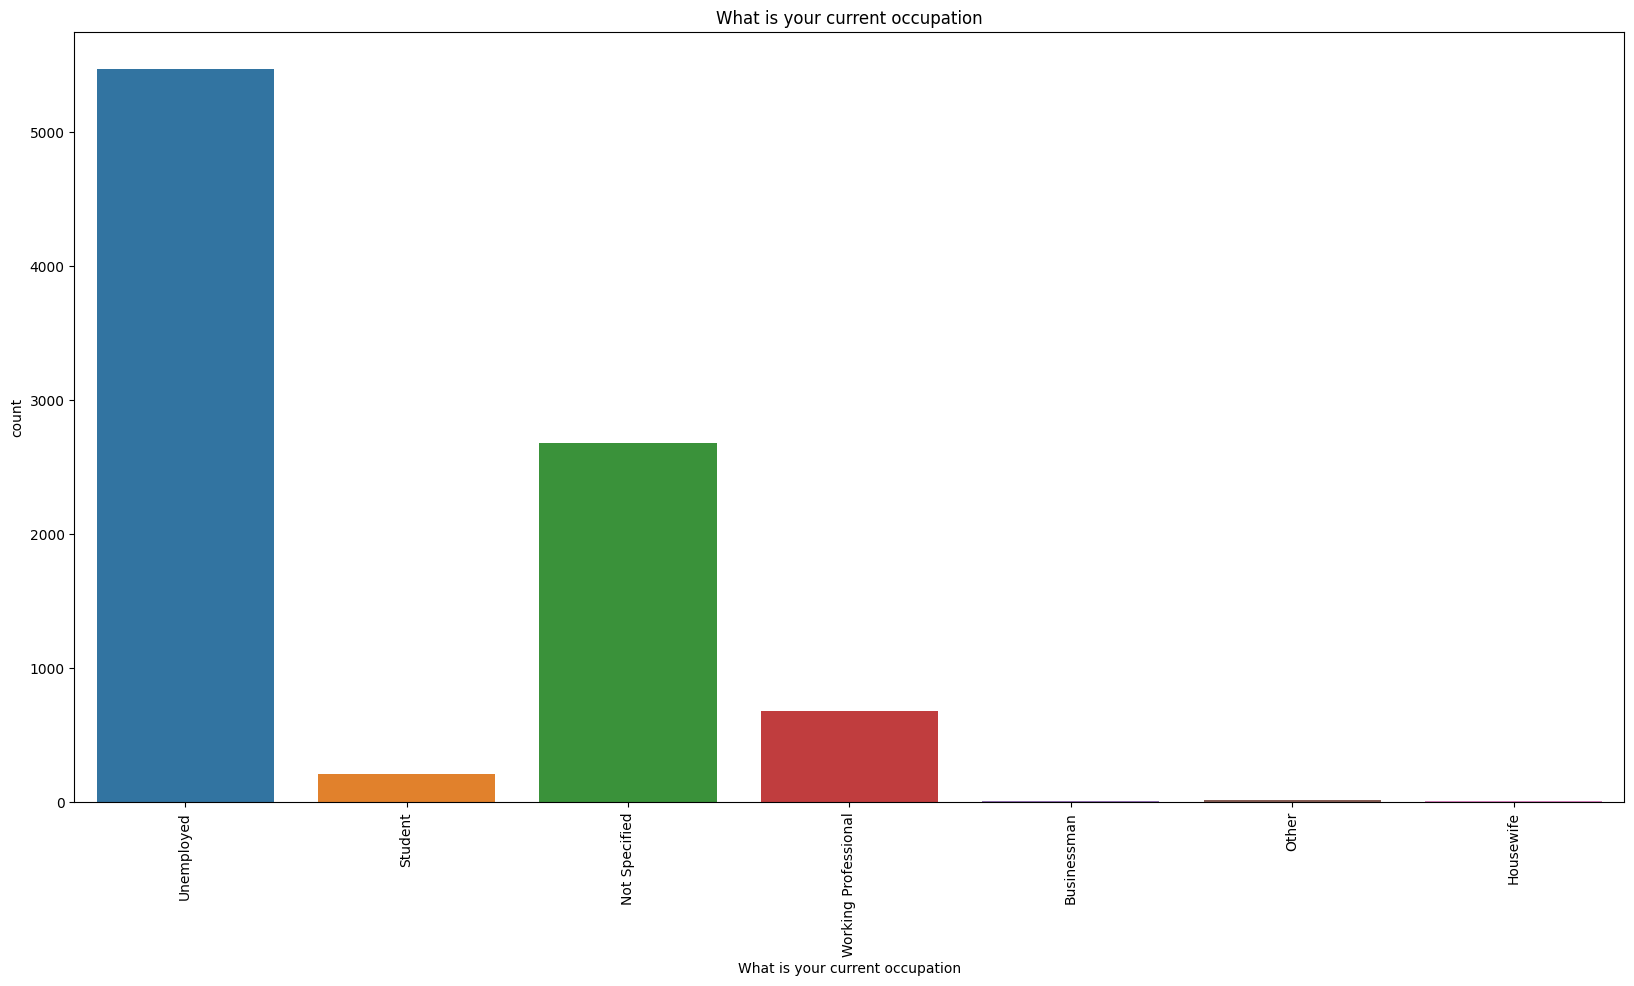

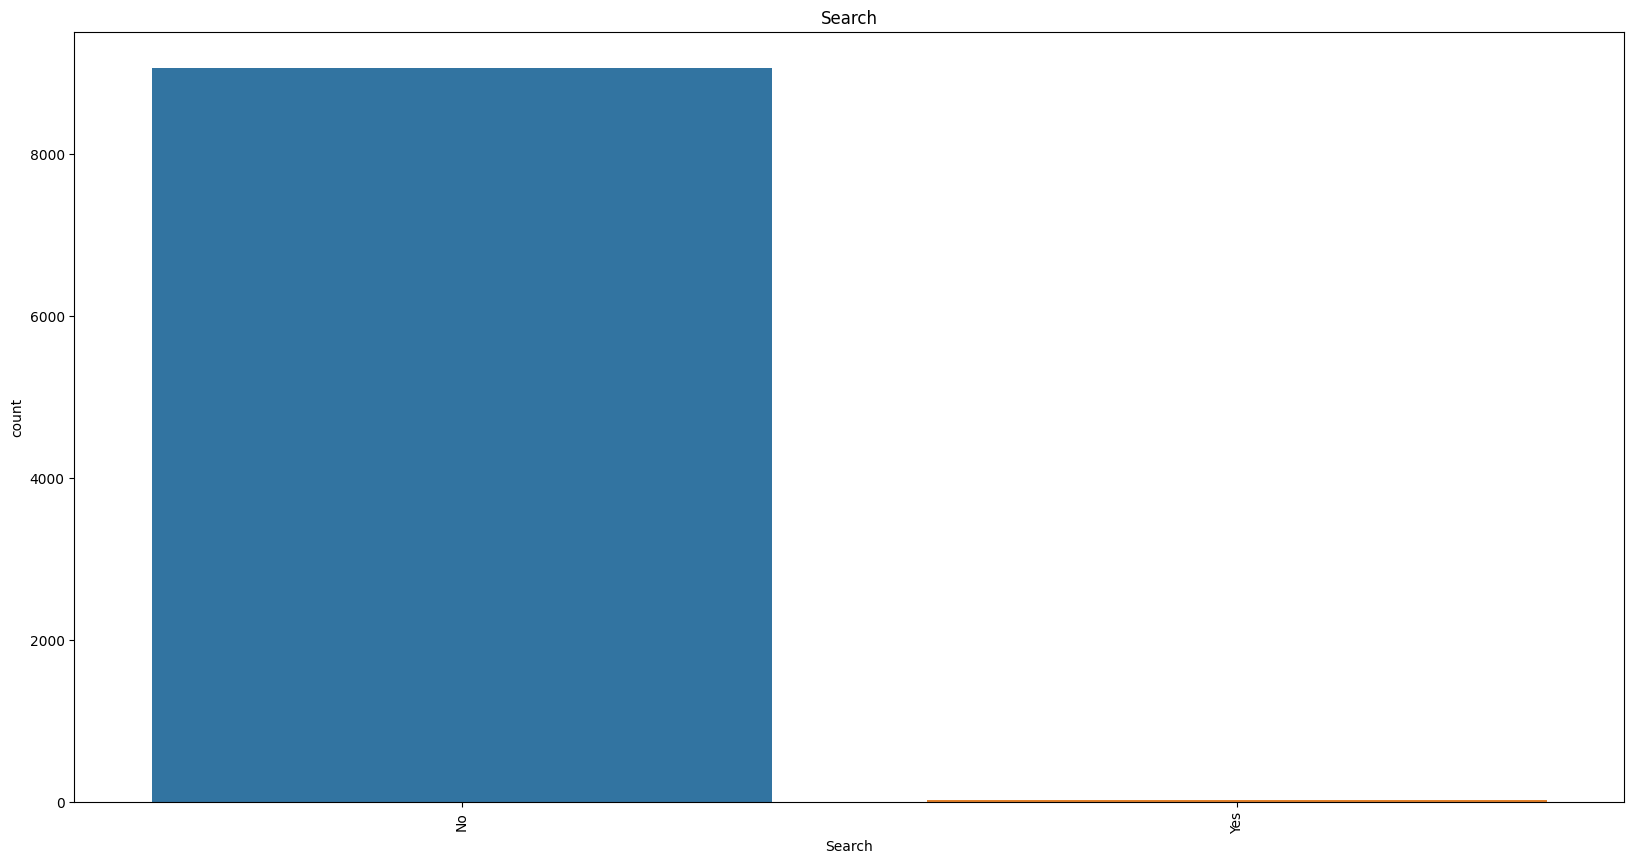

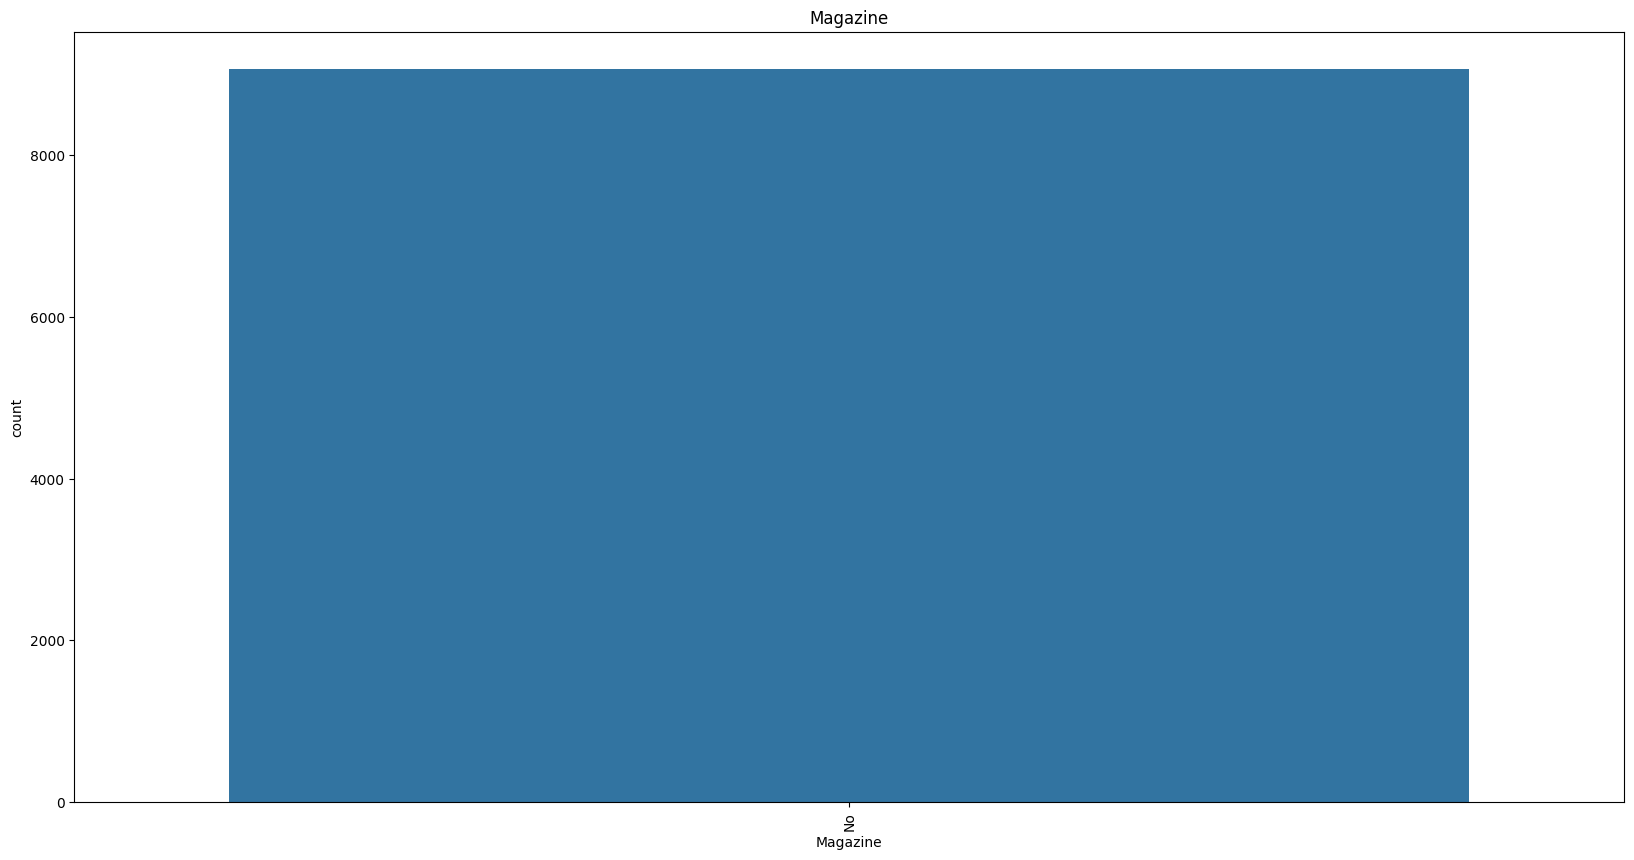

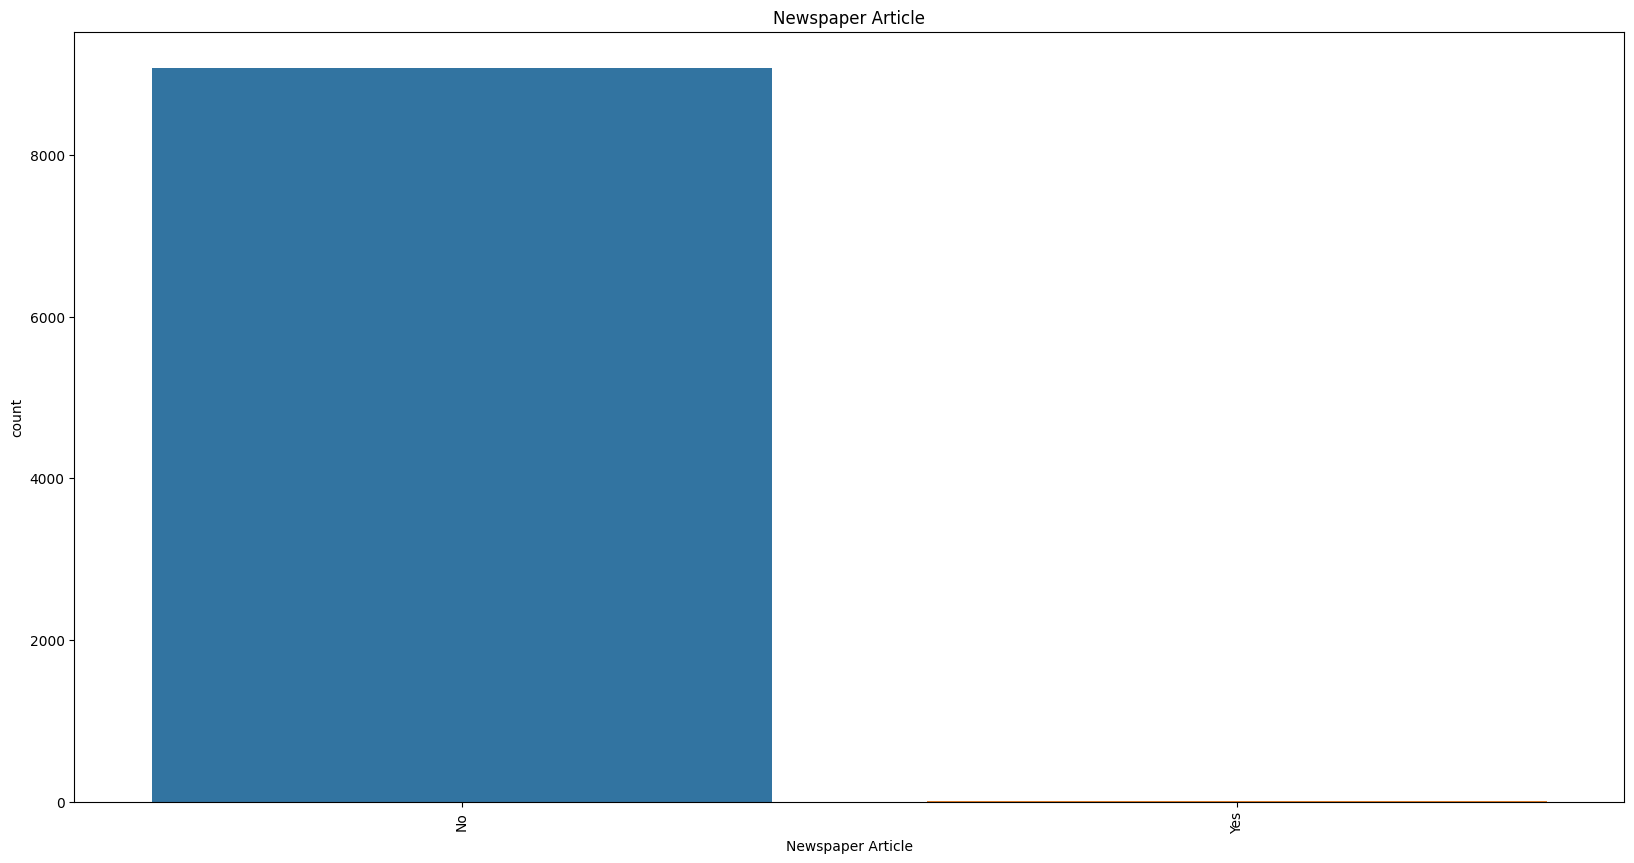

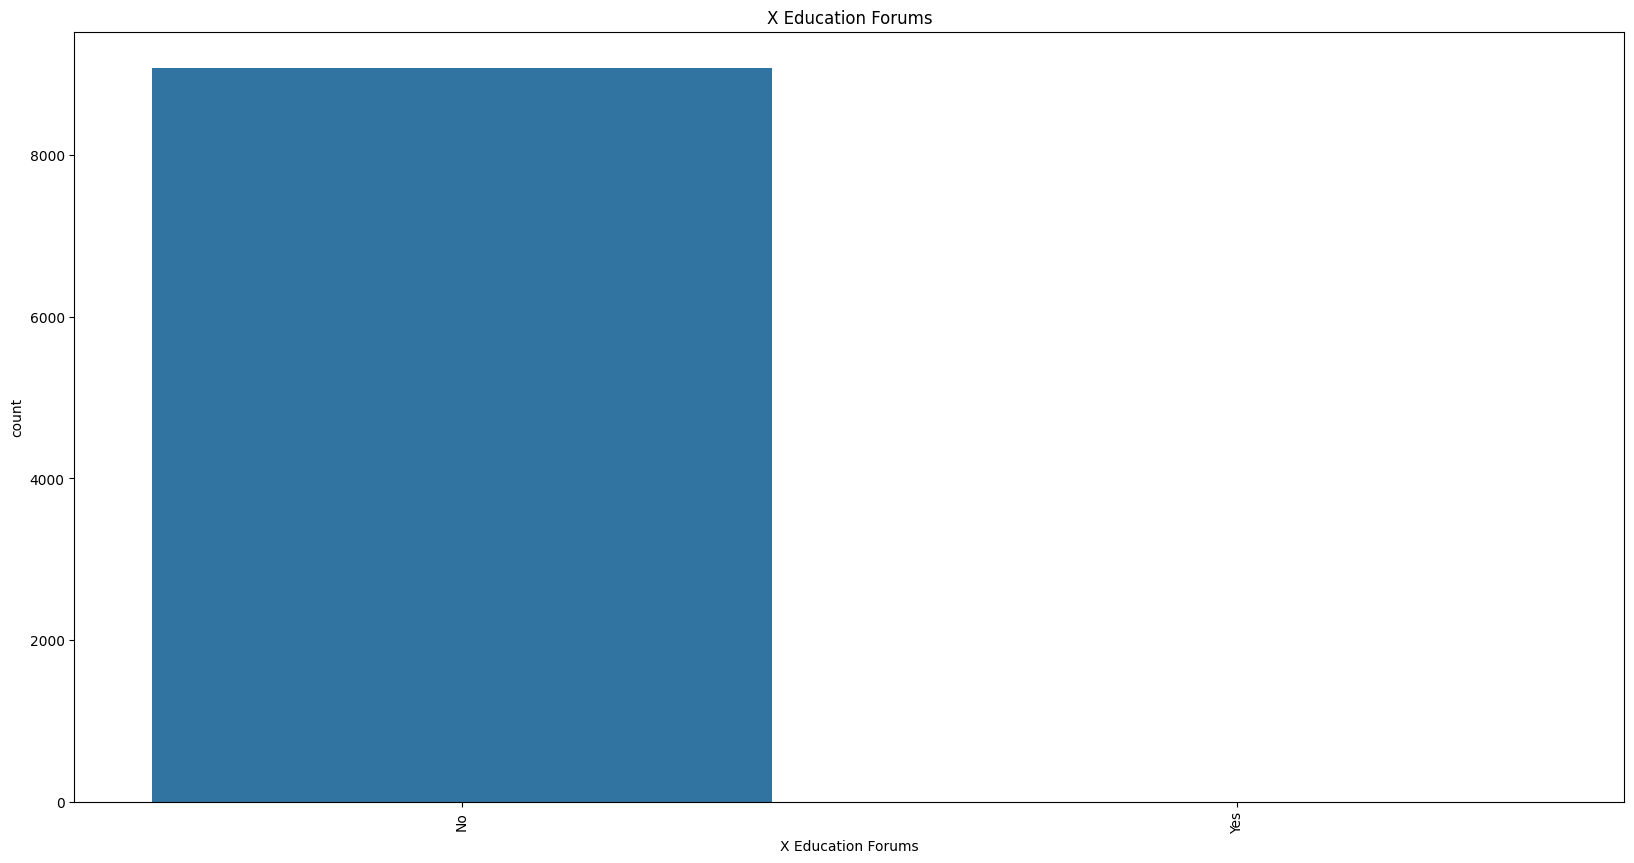

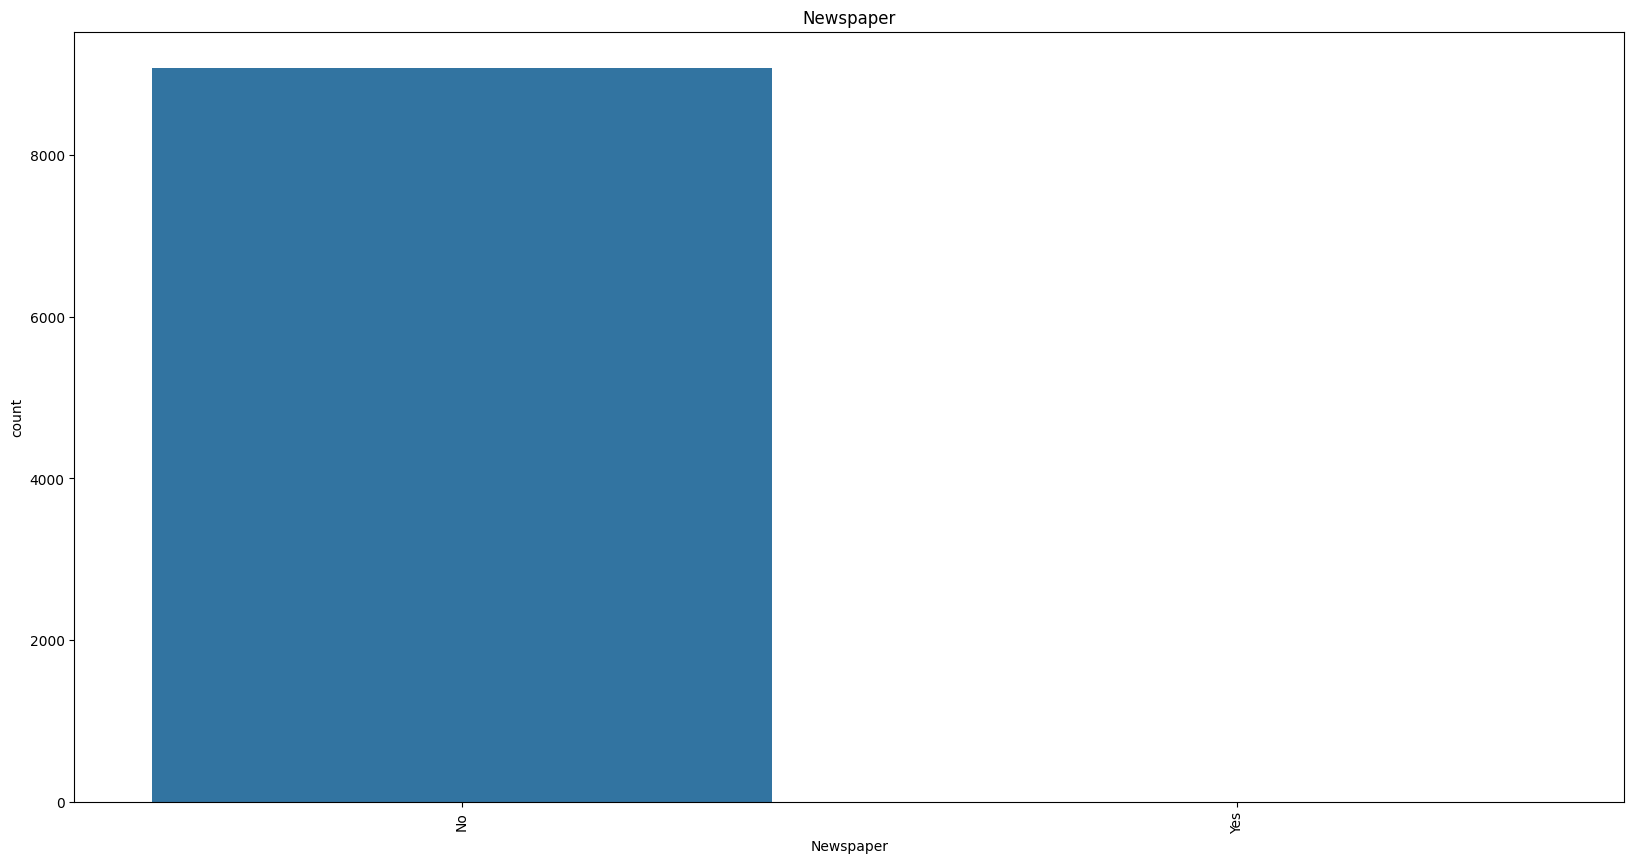

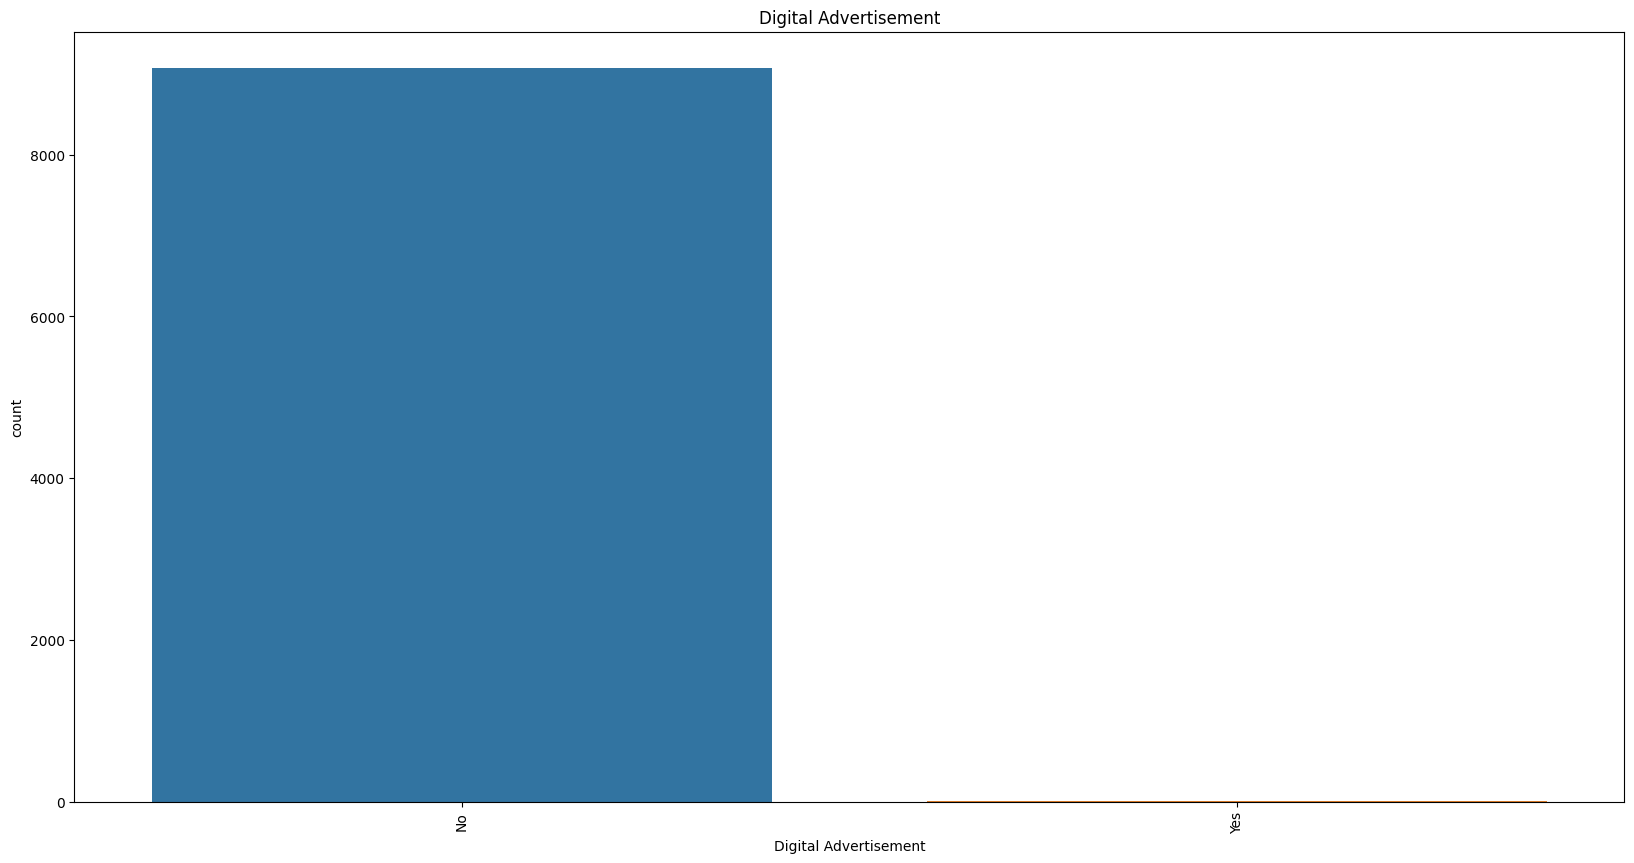

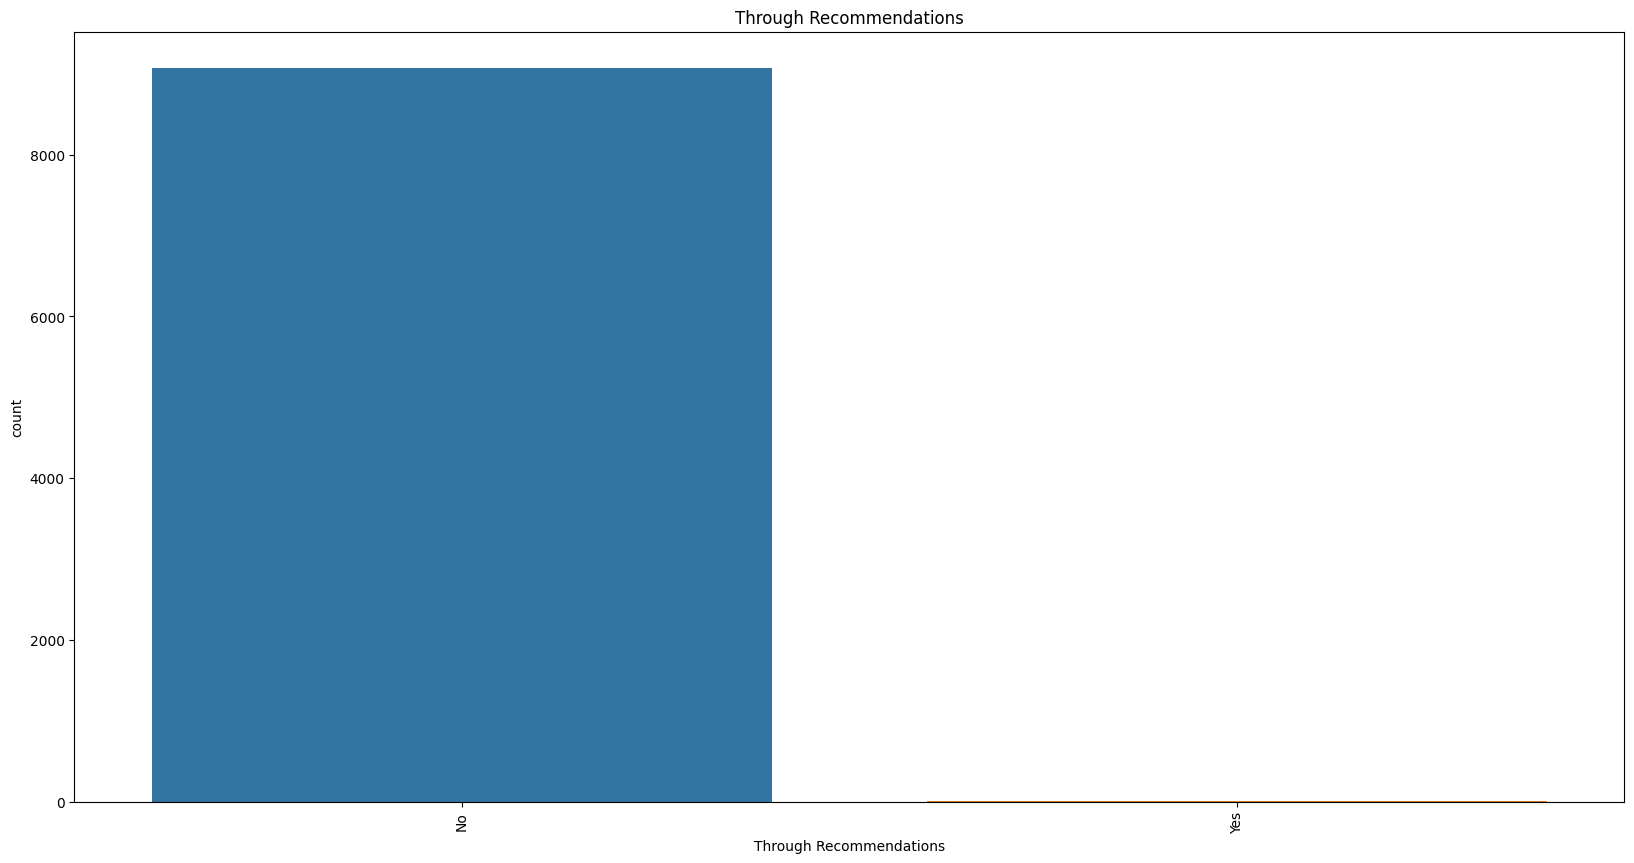

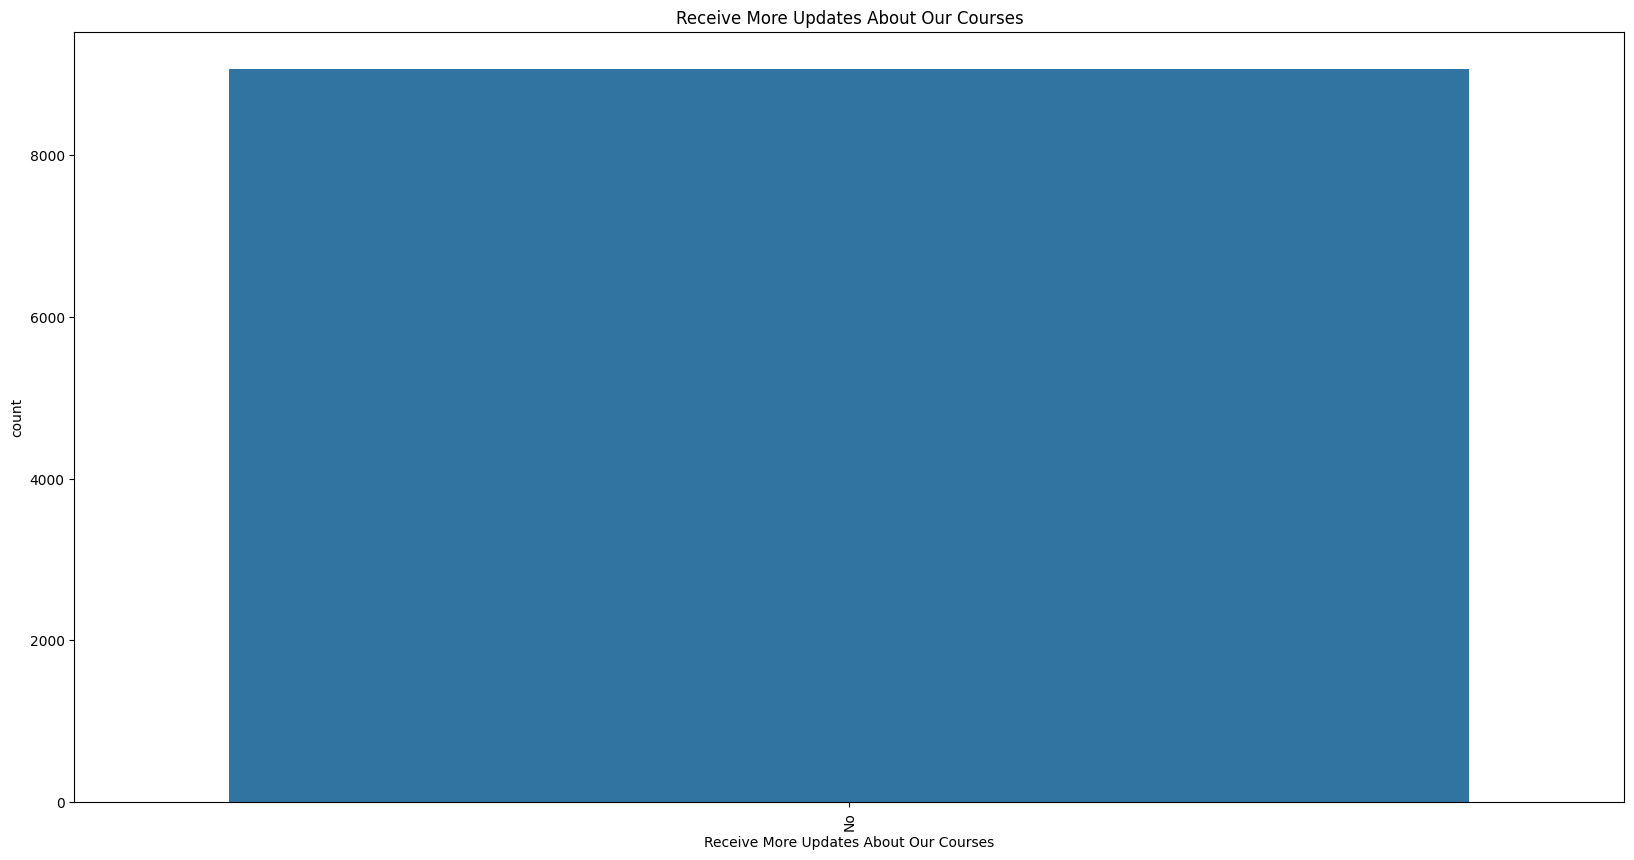

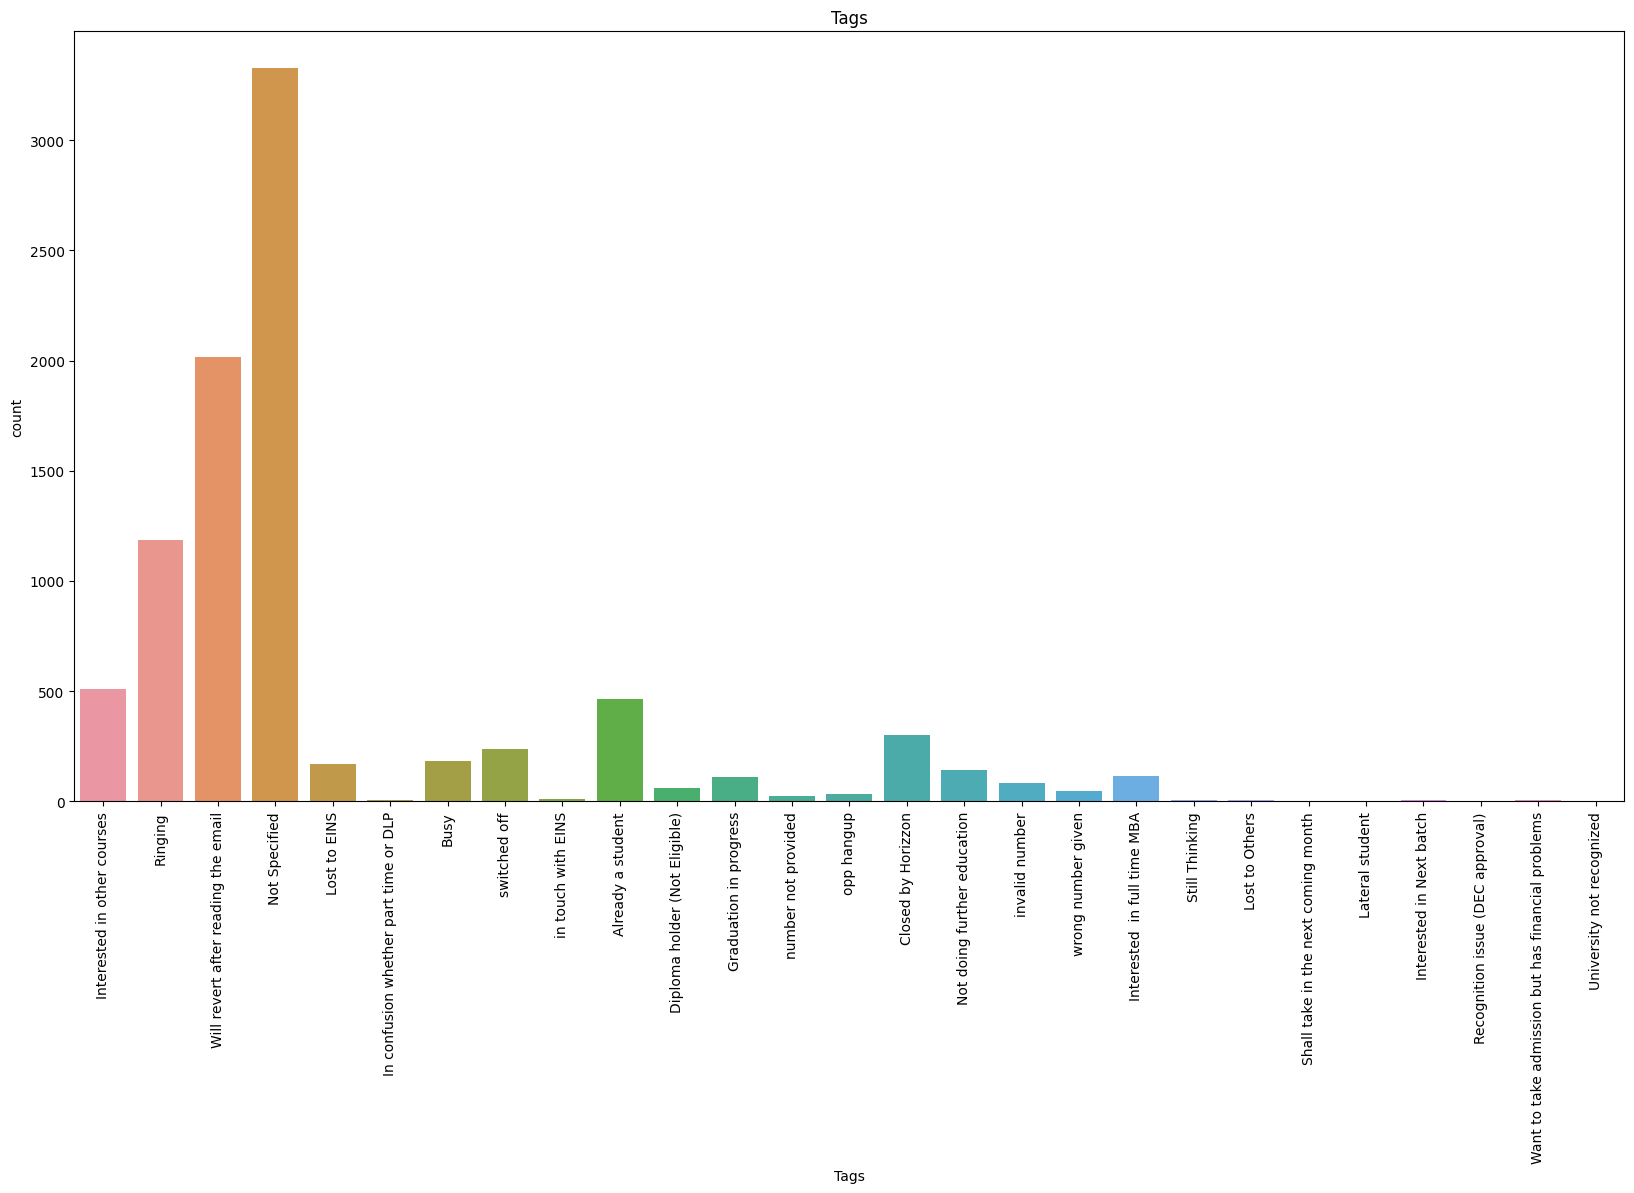

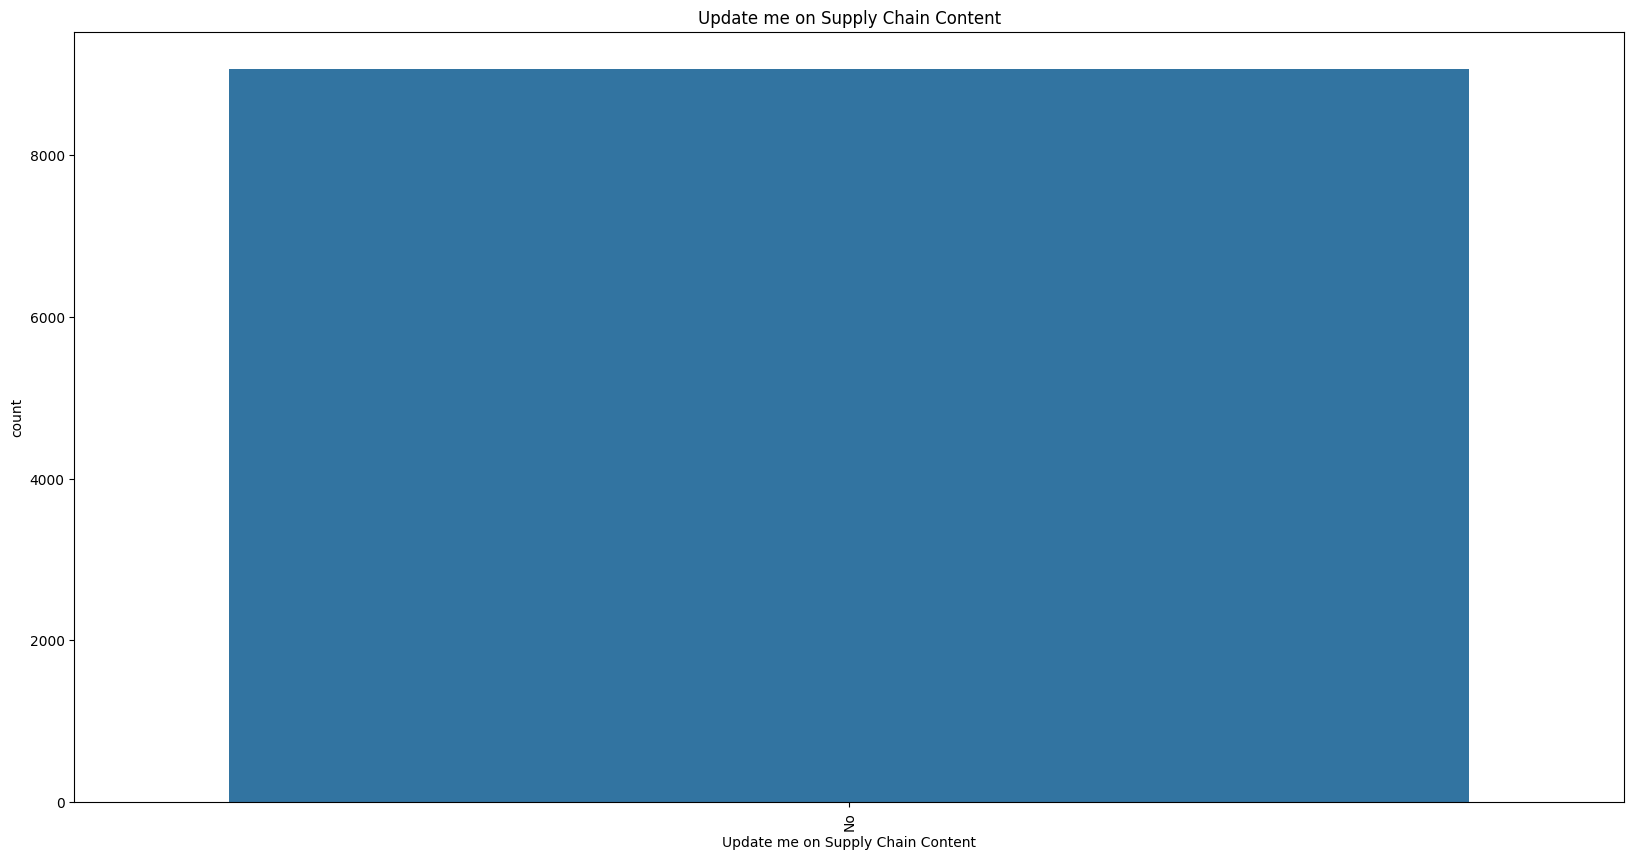

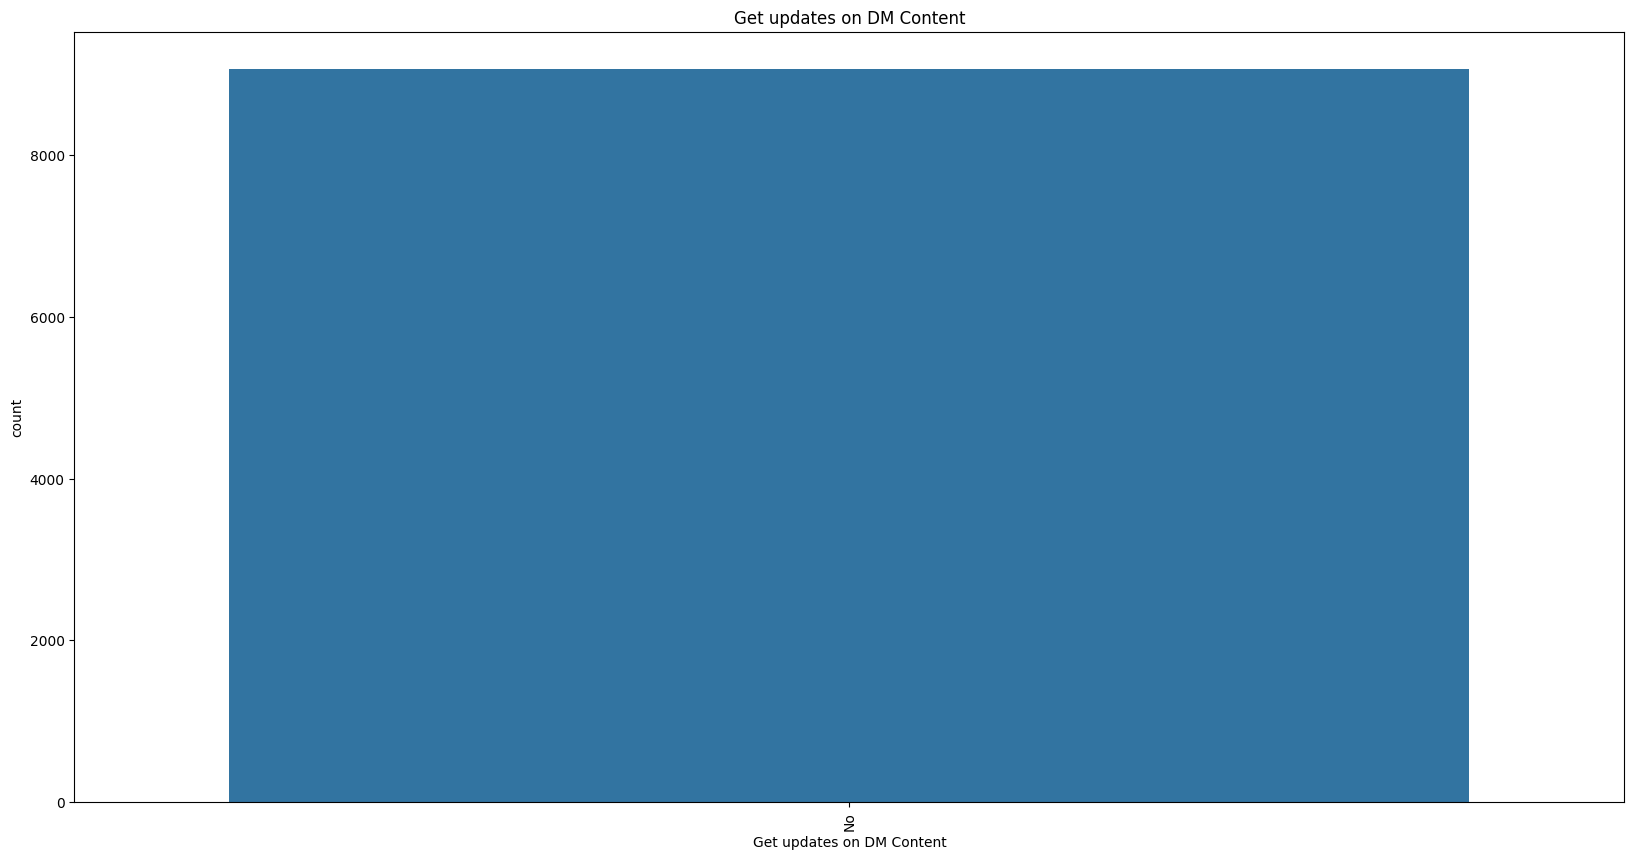

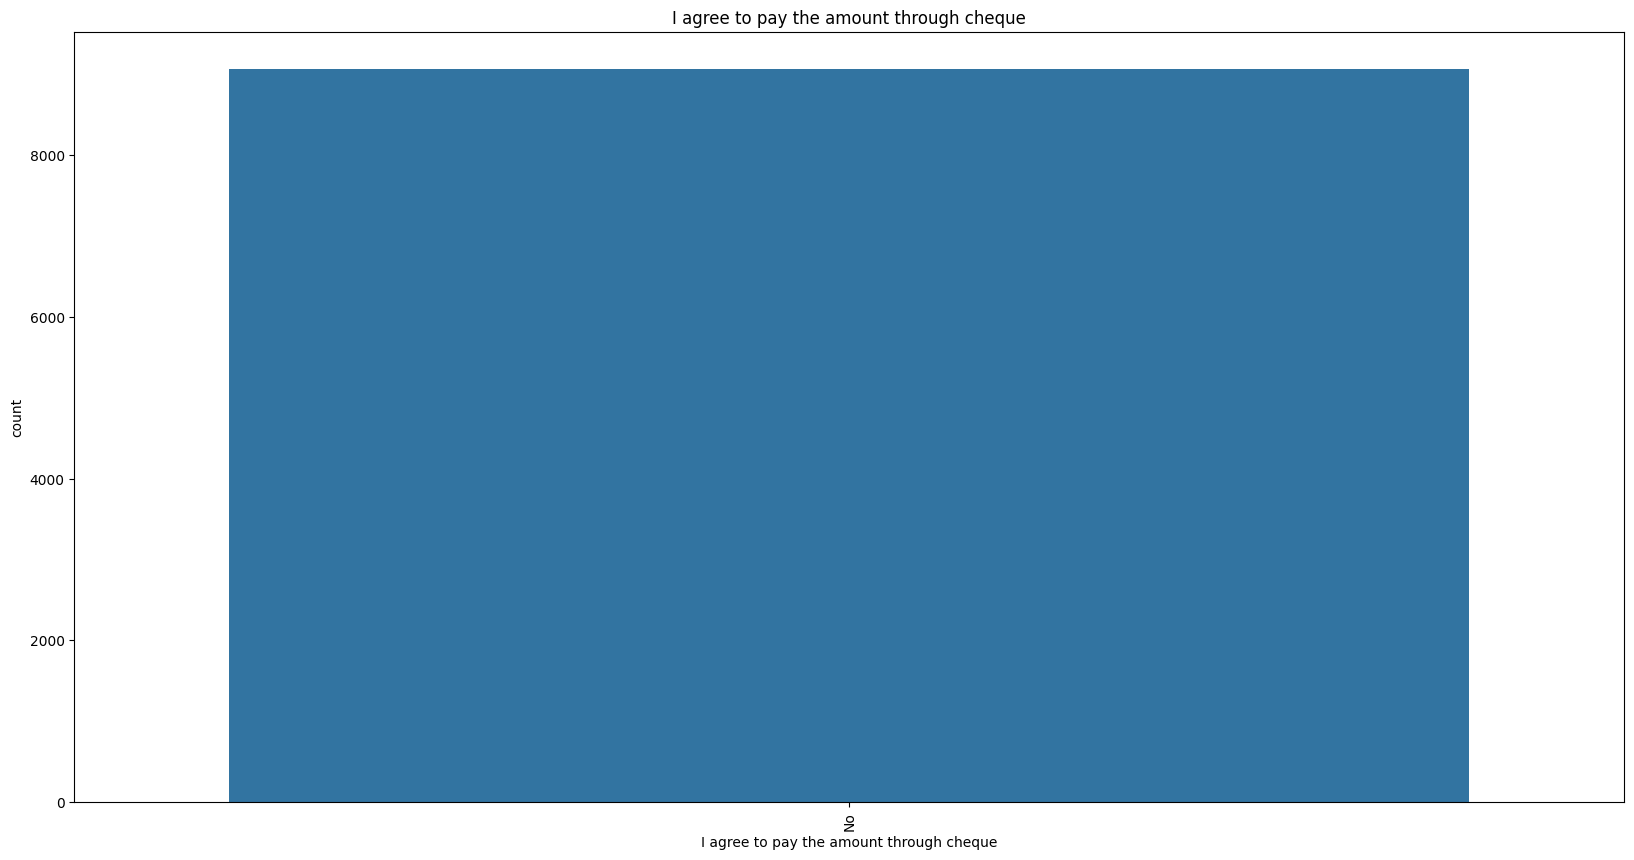

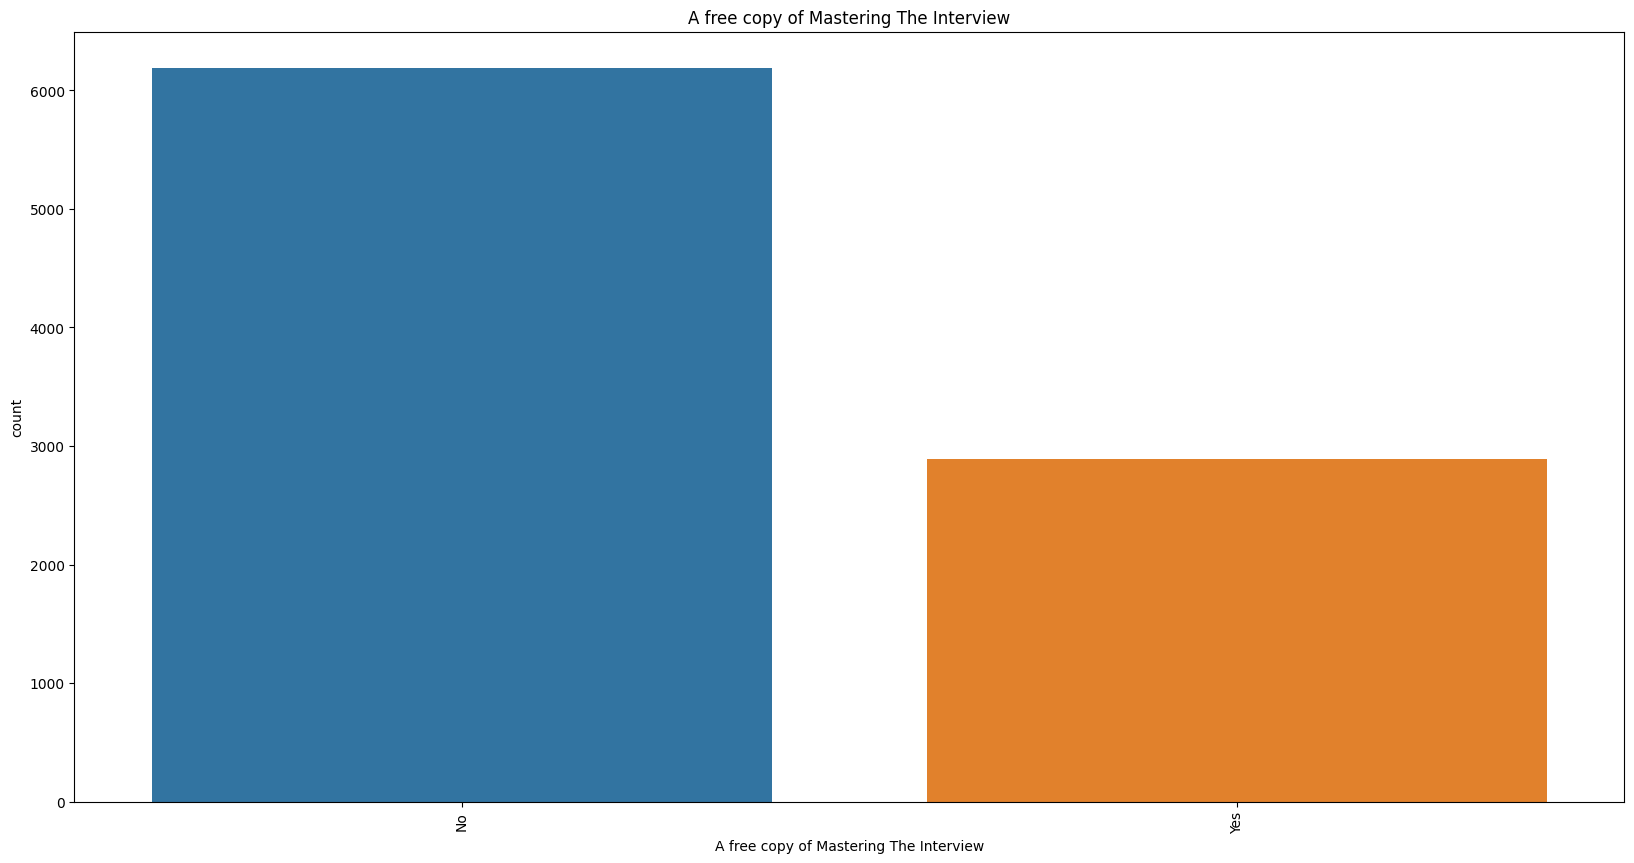

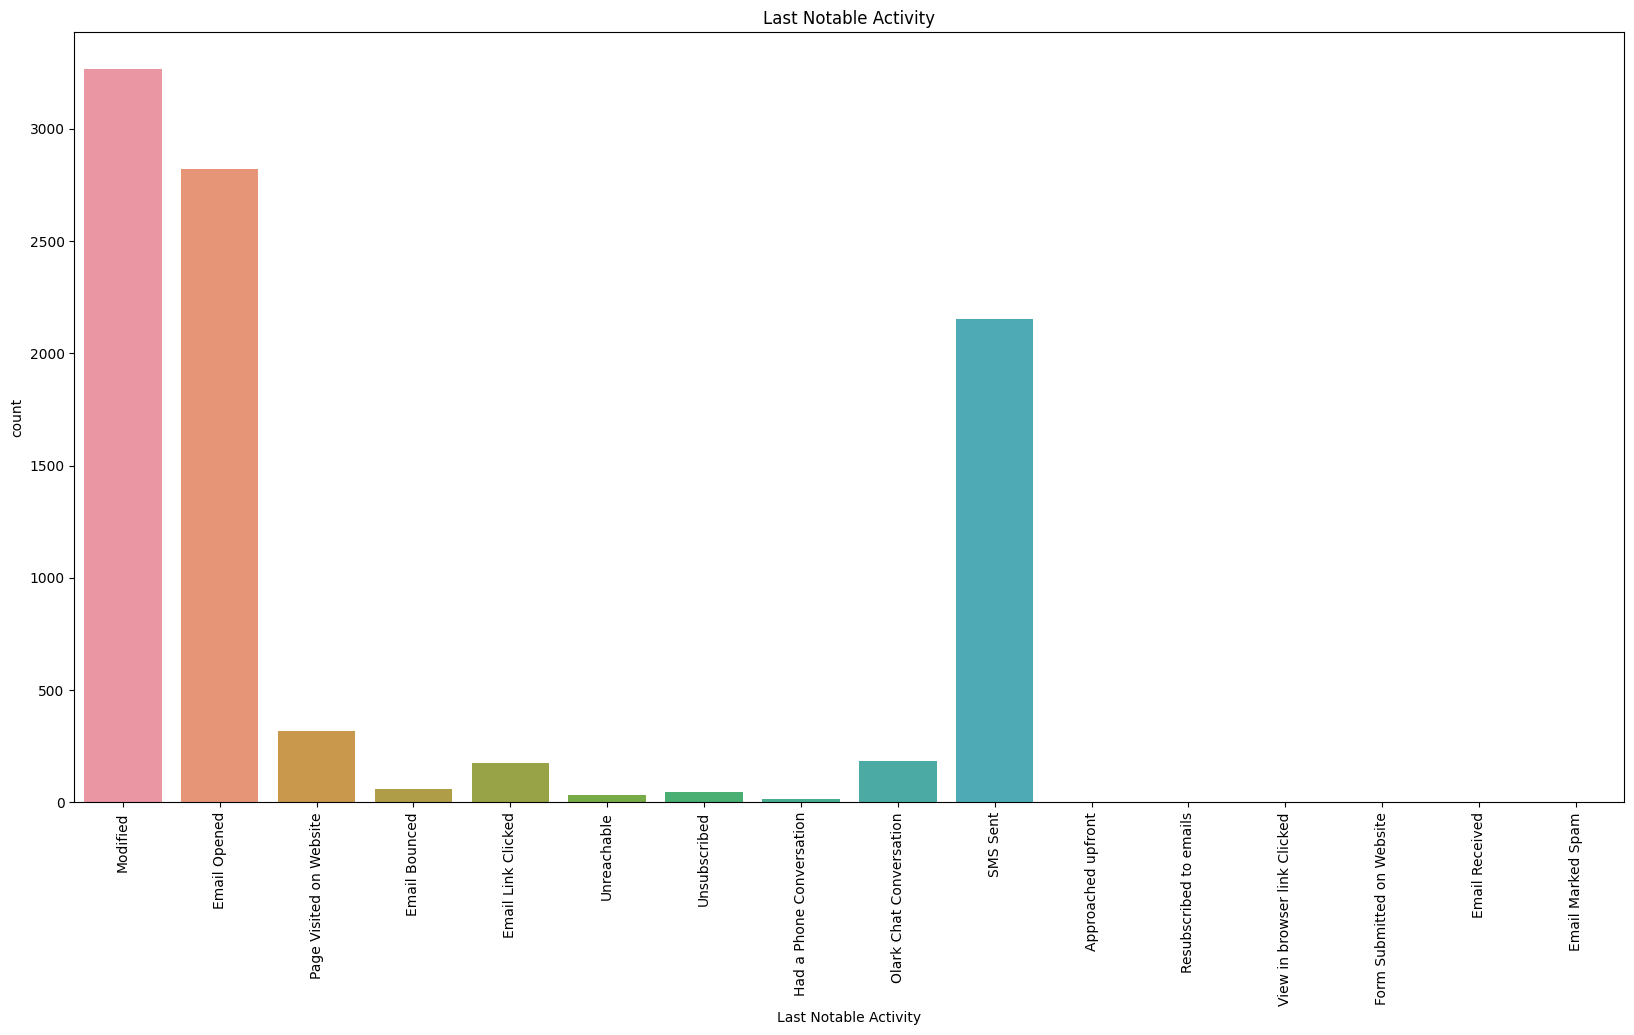

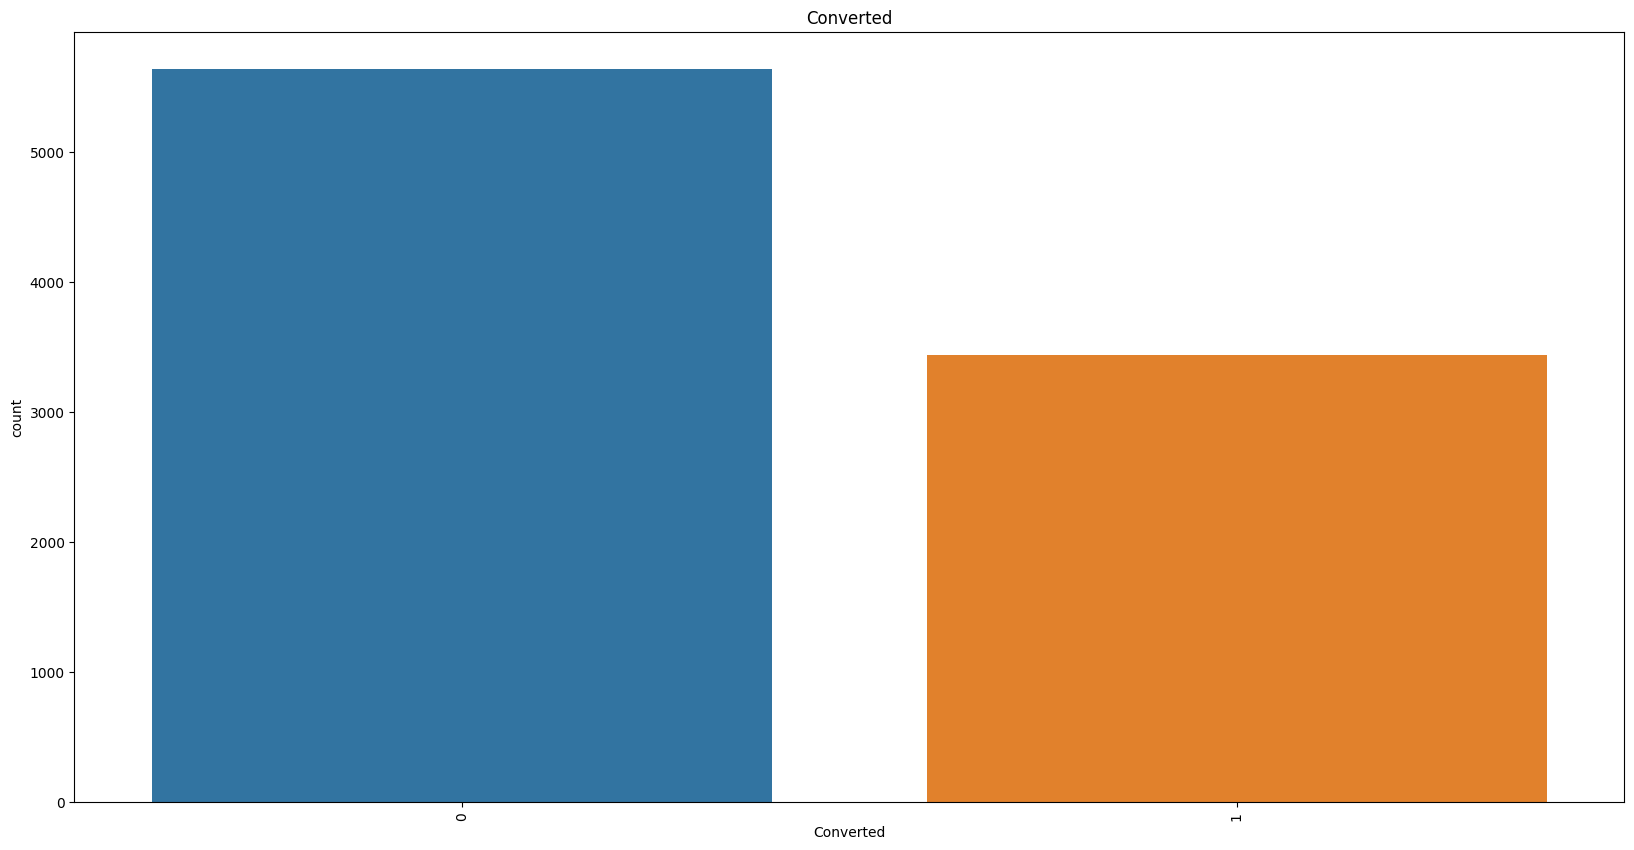

In [228]:
for col in categorical_columns:
    plt.figure(figsize=[20, 10])
    sns.countplot(data=leads, x=col)
    plt.title(col)
    plt.xticks(rotation=90)
    plt.show()

#### Insight

- There are many columns which have only one entry, hence we should not consider these in for our model.
- There is no significant imbalance in the target variable.
- In Lead Origin, Landing Page Submission is the highest count, followed by API.
- In Lead Source, Google is the highest count, followed by Direct Traffic.
- Customers do not prefer to be emailed.
- The last activity is email opened, followed by sms sent
- Customers are mainly unemployed
- Majority of customers do not specify their specialization.
- Majority of tags given are 'will revert after reading email', followed by 'ringing'
- Customers have not specified their profile, preferring the placeholder 'Select'. It will be replaced by 'Not Specified' as per our strategy.
- Customers do not prefer to have a free copy of 'Mastering the Interview'.
- The last known activity is primarily 'SMS sent', closely followed by 'Email Opened' and then 'Modified'

Lets drop all the columns which are redundant.

In [229]:
drop_columns = [
    'Do Not Call',
    'Search',
    'Magazine',
    'Newspaper Article',
    'X Education Forums',
    'Newspaper',
    'Digital Advertisement',
    'Through Recommendations',
    'Receive More Updates About Our Courses',
    'Update me on Supply Chain Content',
    'Get updates on DM Content',
    'I agree to pay the amount through cheque']

leads.drop(columns=drop_columns, inplace=True)

We will remove the columns which we have dropped from the categorical columns

In [230]:
categorical_columns = [col for col in categorical_columns if col not in drop_columns]
categorical_columns

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'A free copy of Mastering The Interview',
 'Last Notable Activity',
 'Converted']

### Note

Even if Specialization column has more null values, we have decided to keep it for now as the specialization is an important aspect of a student and might have an impact on the prediction of whether a student will take the course or not.

## Bivariate Analysis

### Numerical v/s Target

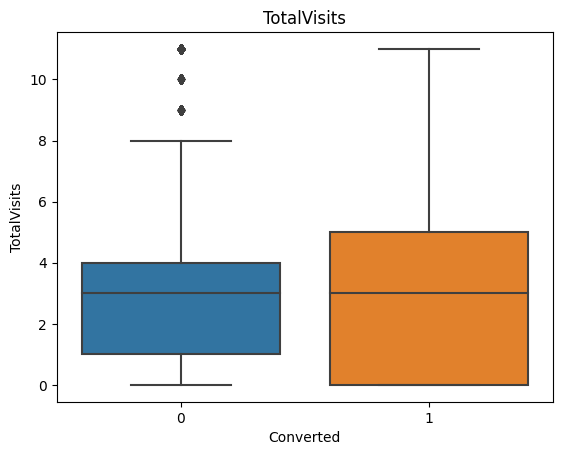

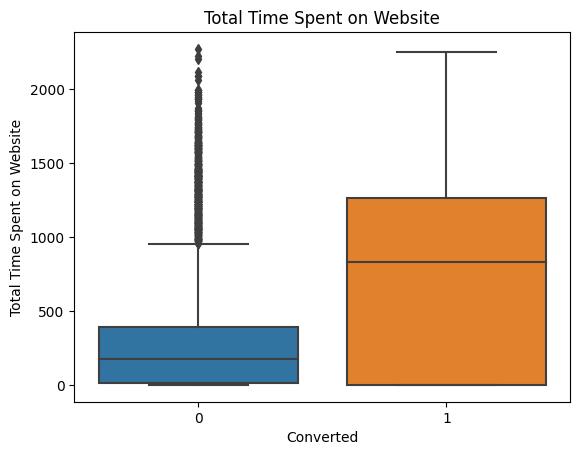

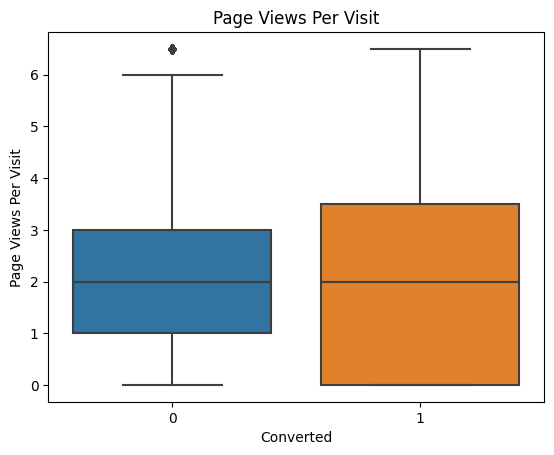

In [231]:
for col in numeric_columns:
    sns.boxplot(data=leads, x='Converted', y=col)
    plt.title(col)
    plt.show()

#### Insight

- For Page Views Per Visit and Total visits, the median values for both categories are the same.
- Leads which have converted have a higher median time spent on website.

### Categorical v/s Target

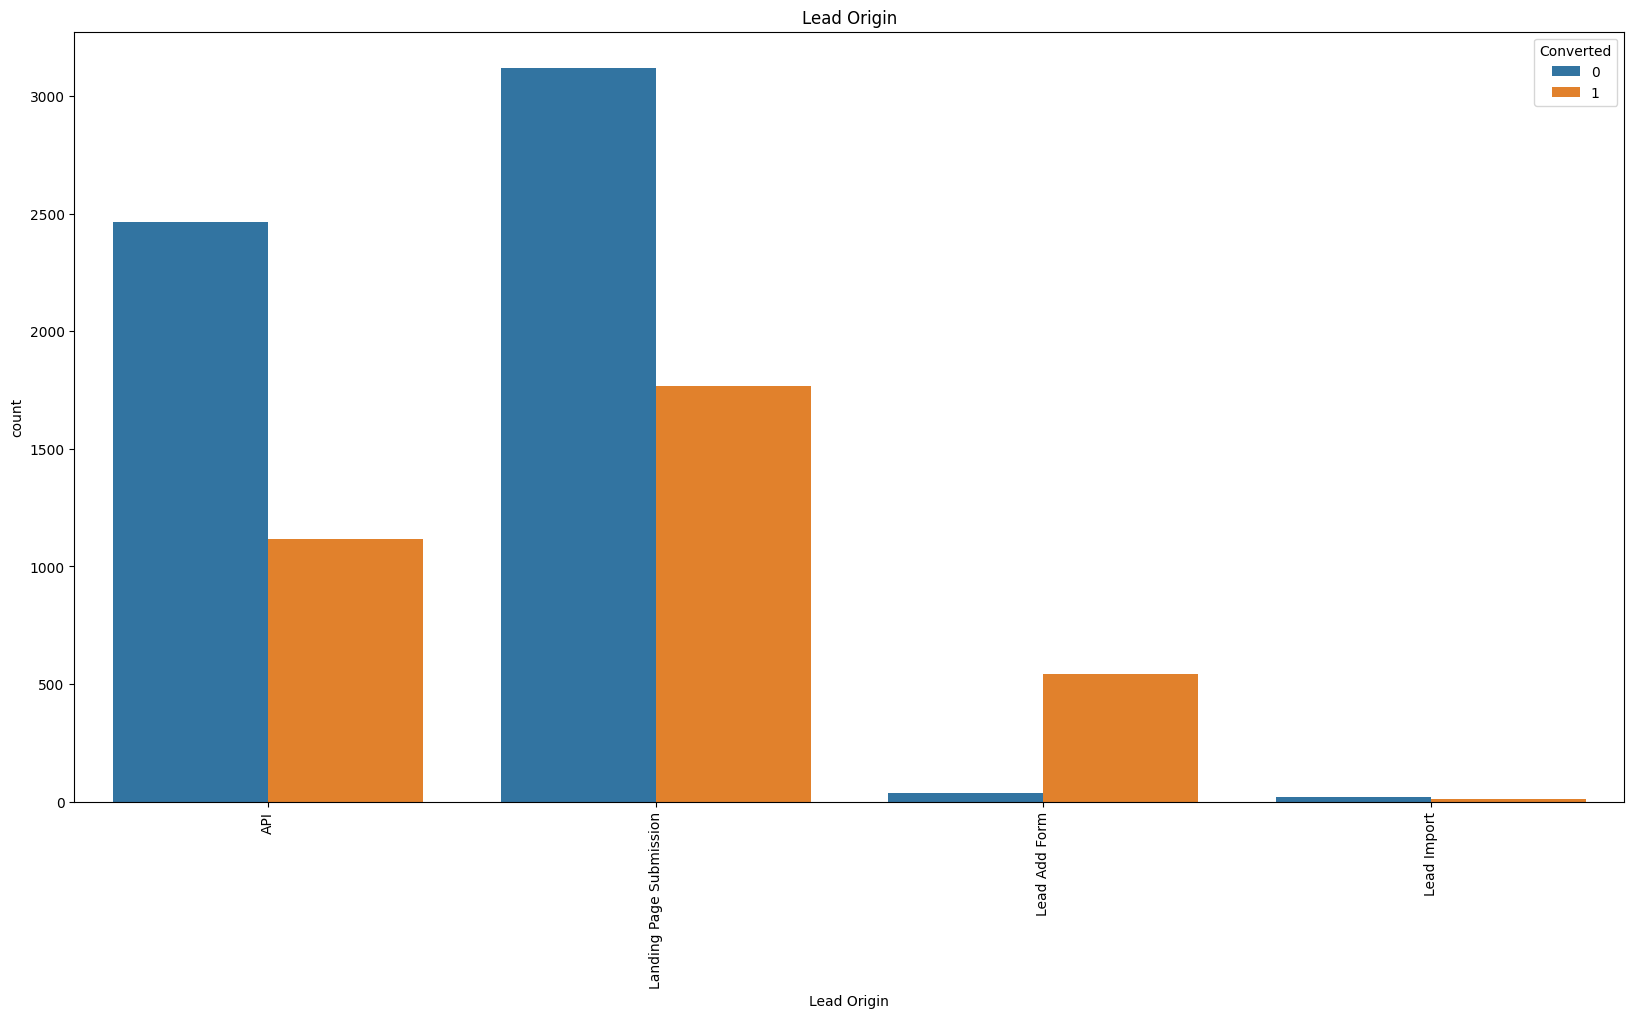

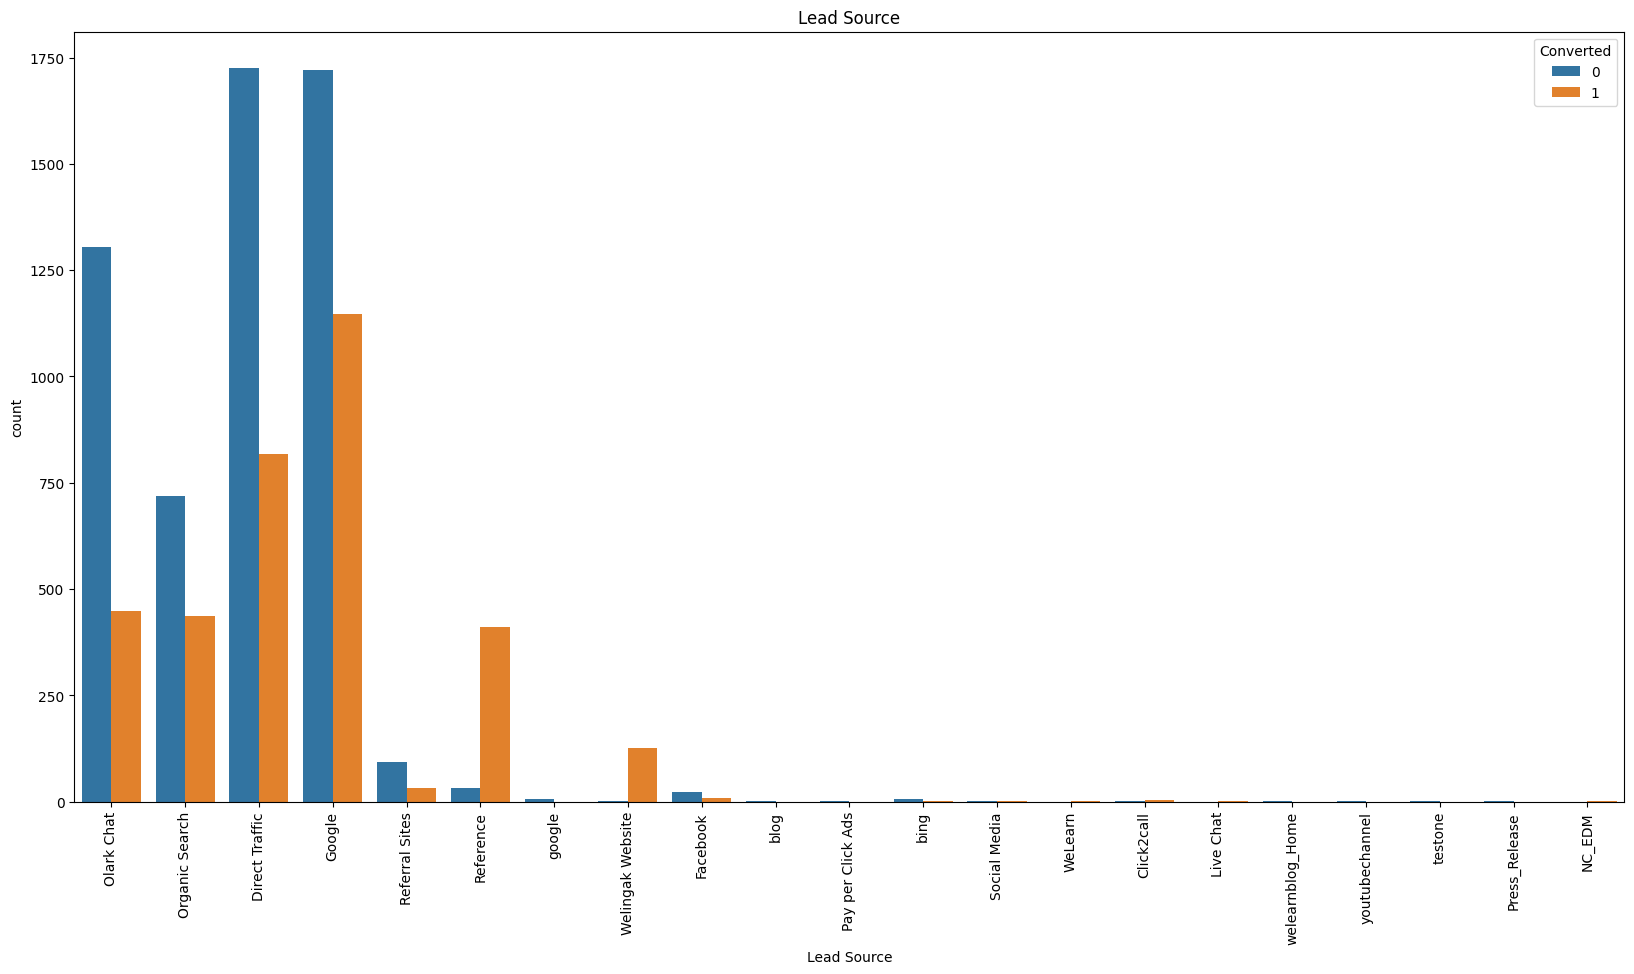

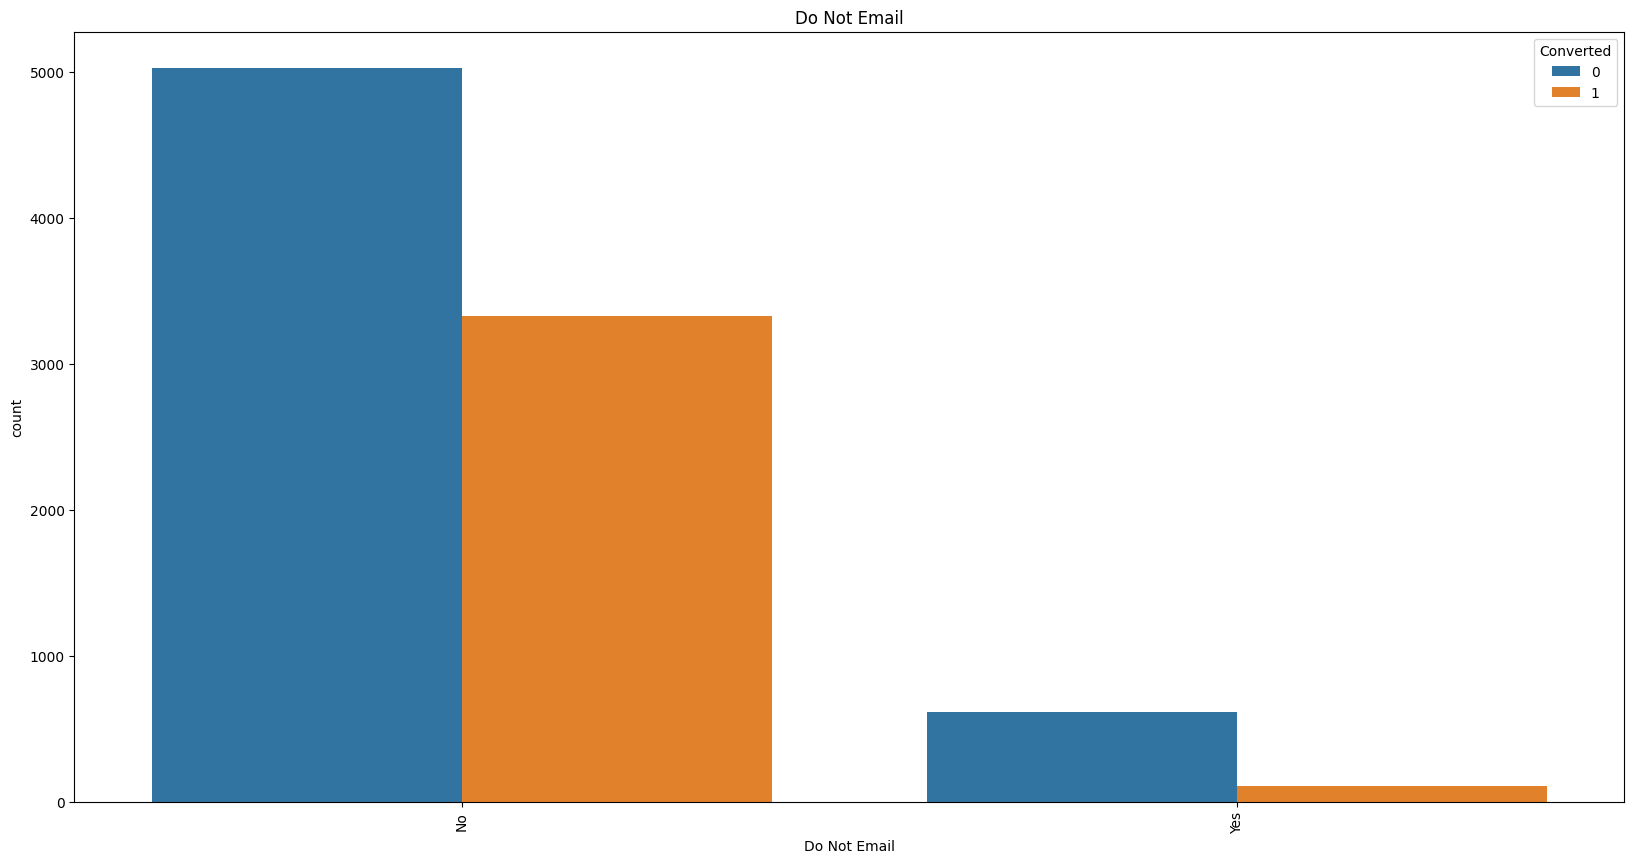

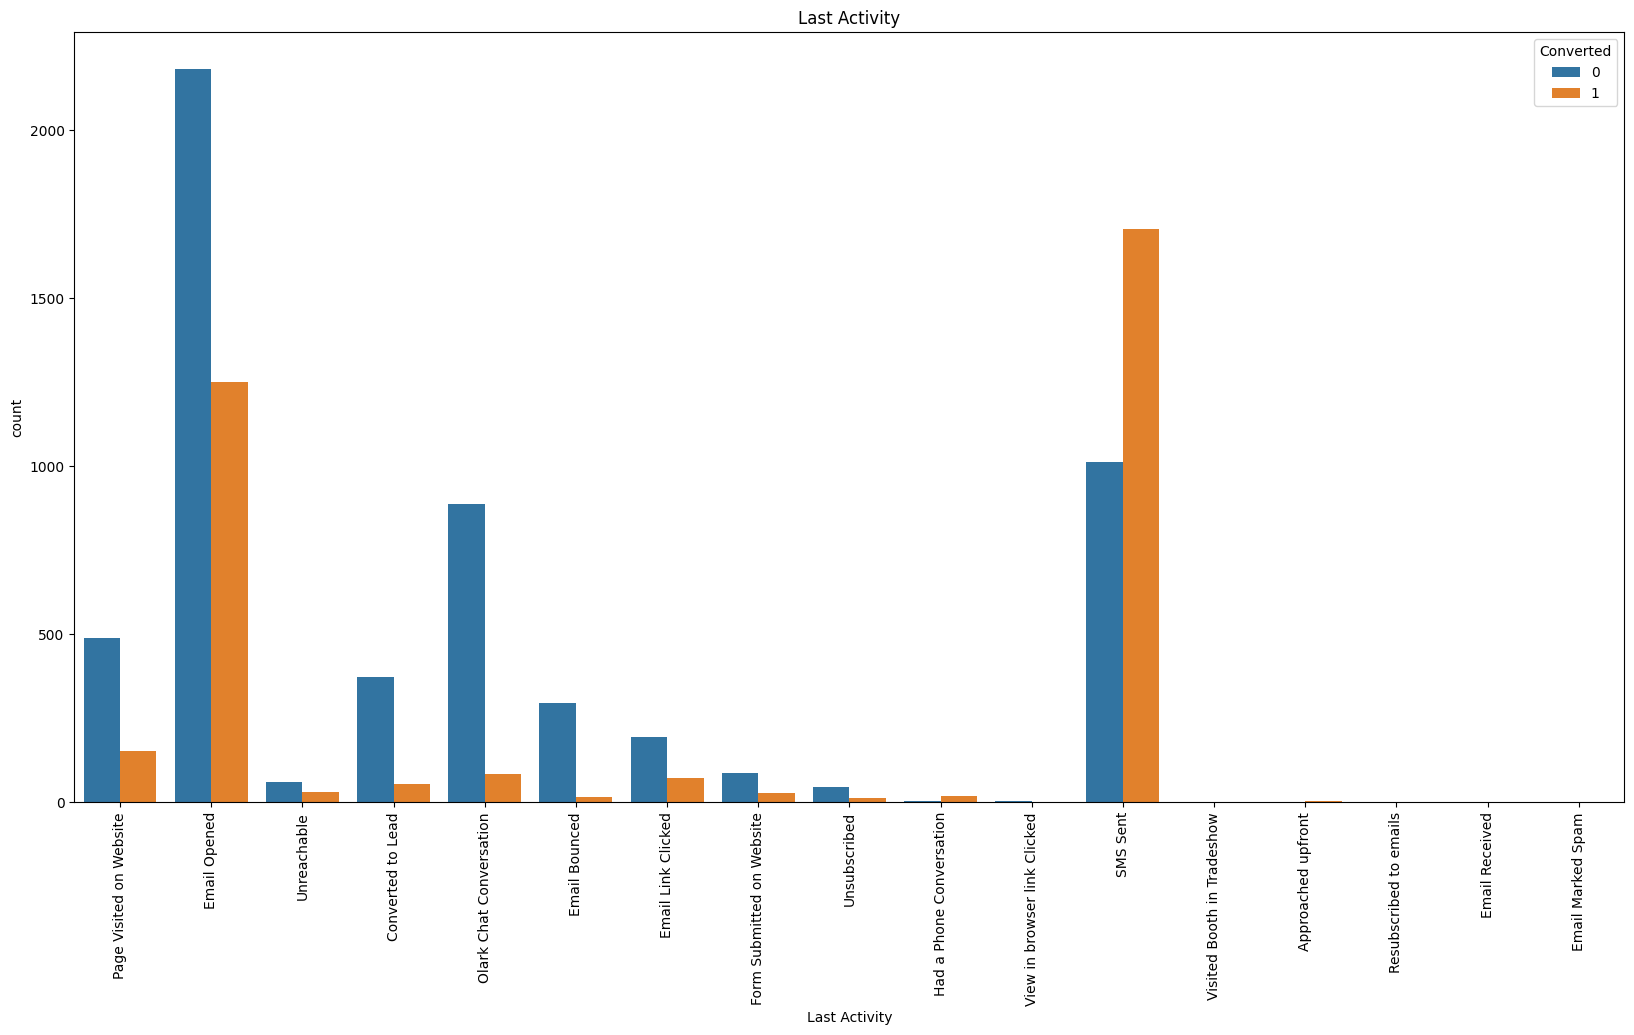

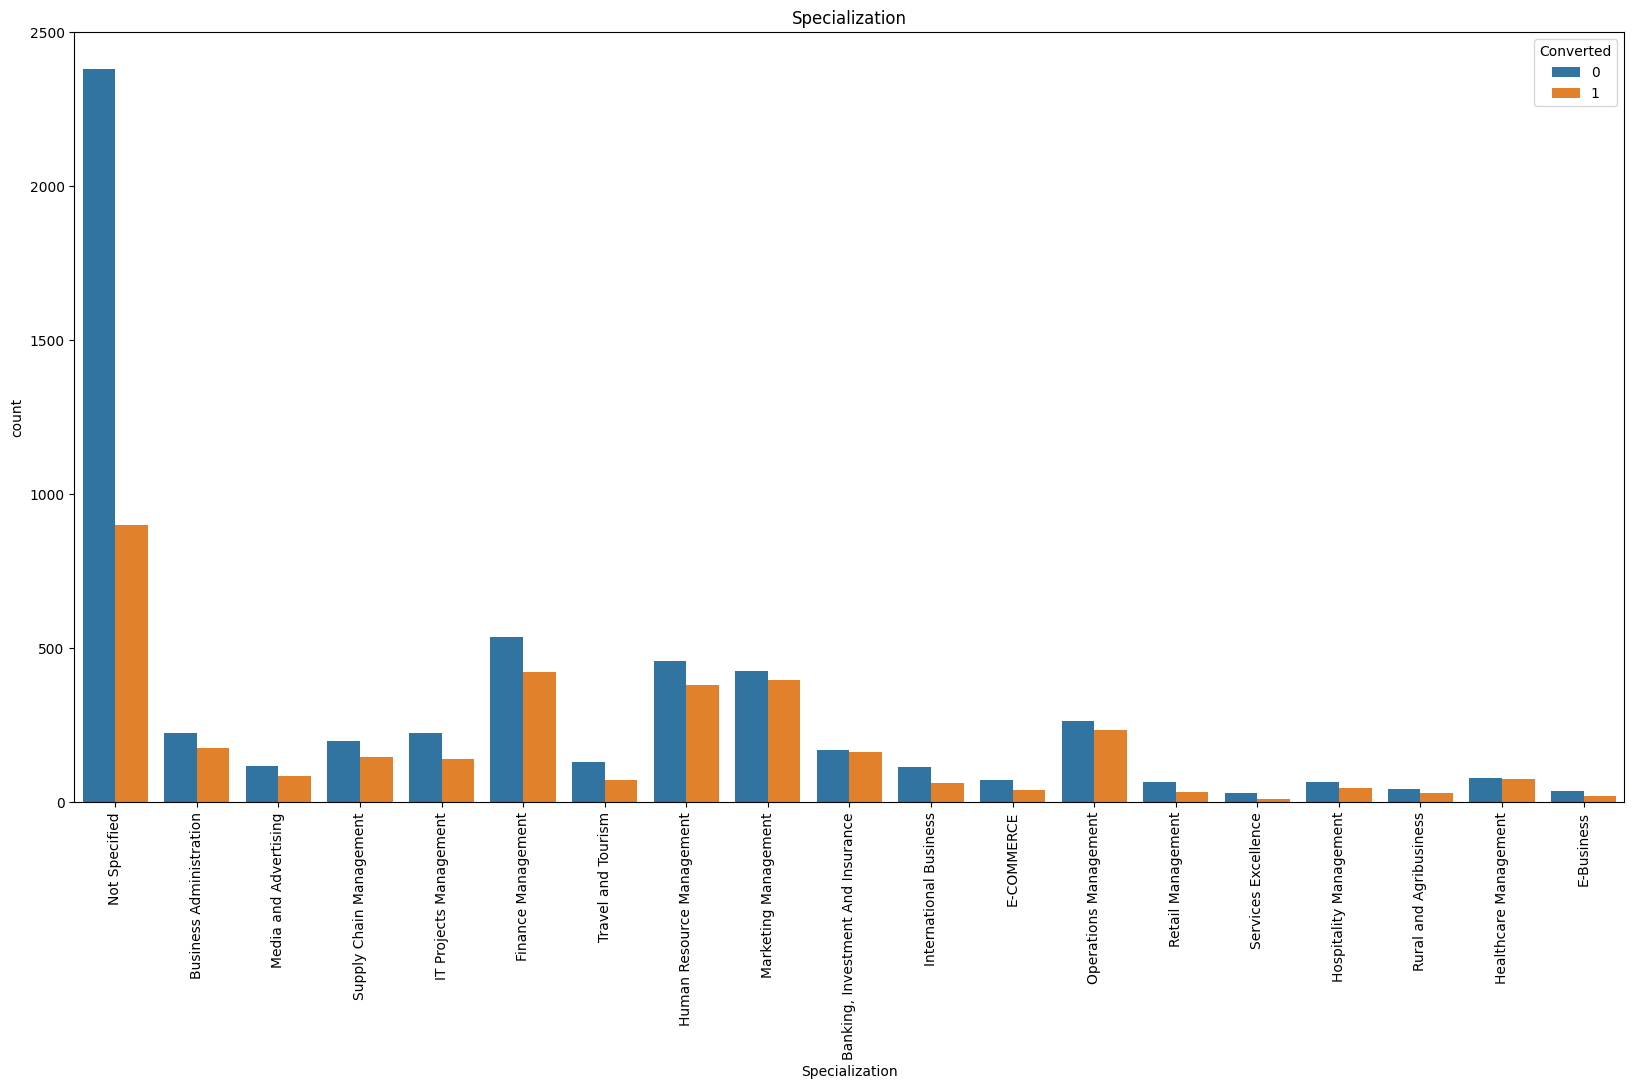

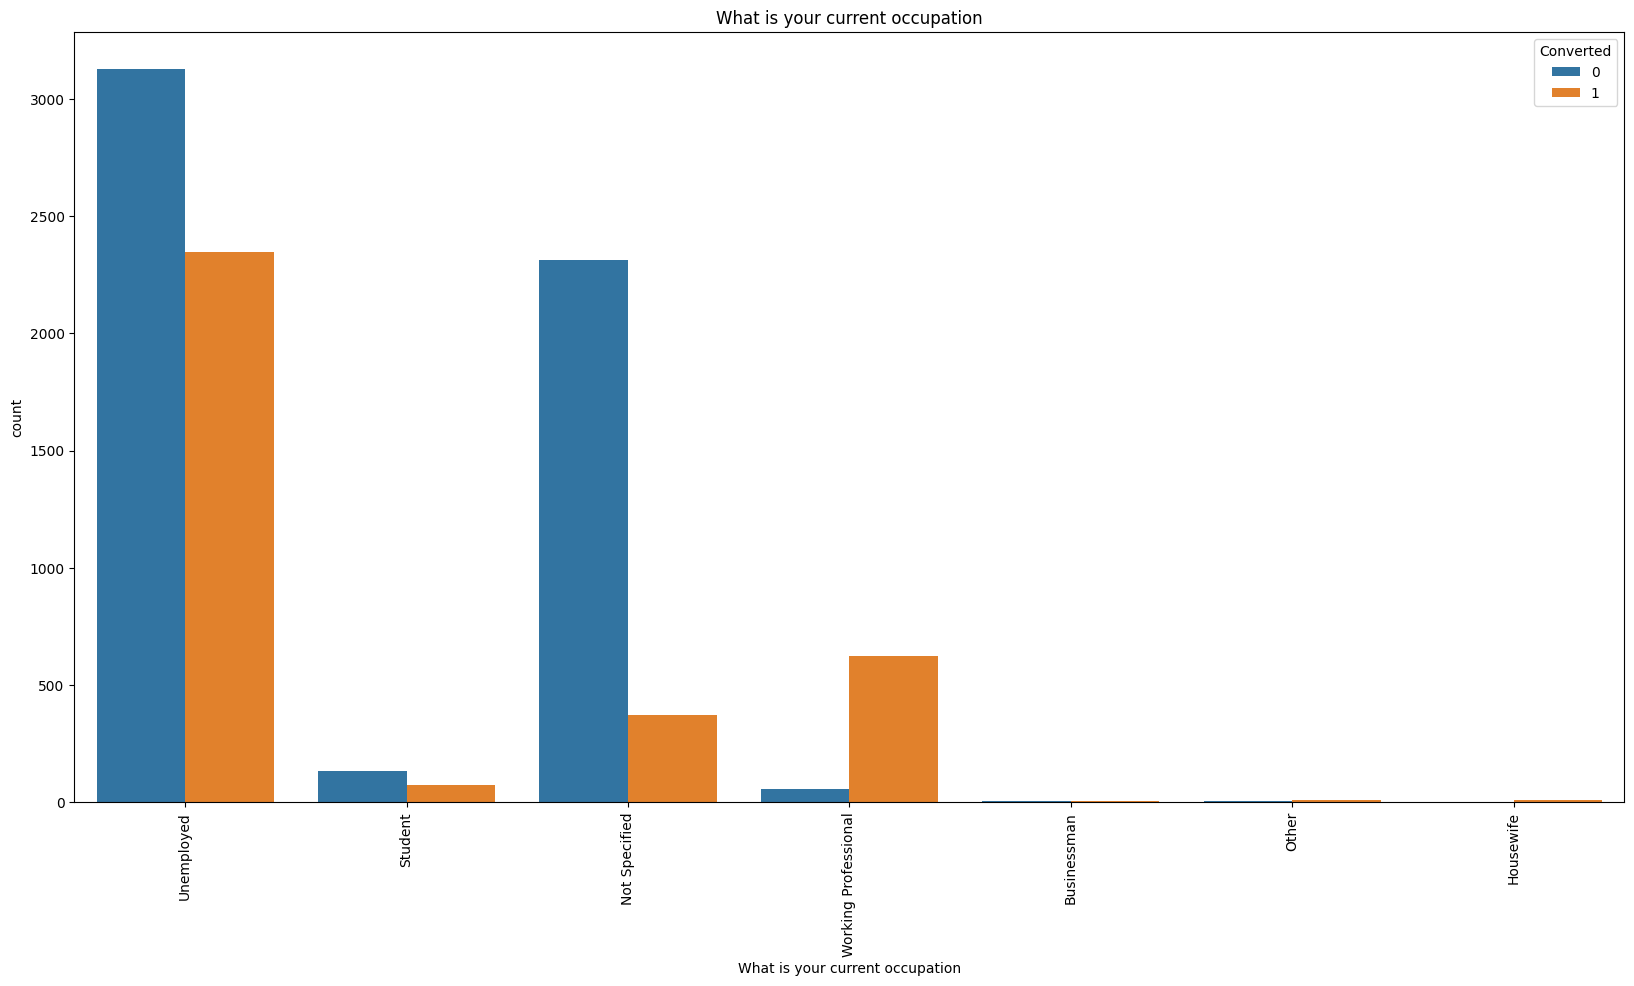

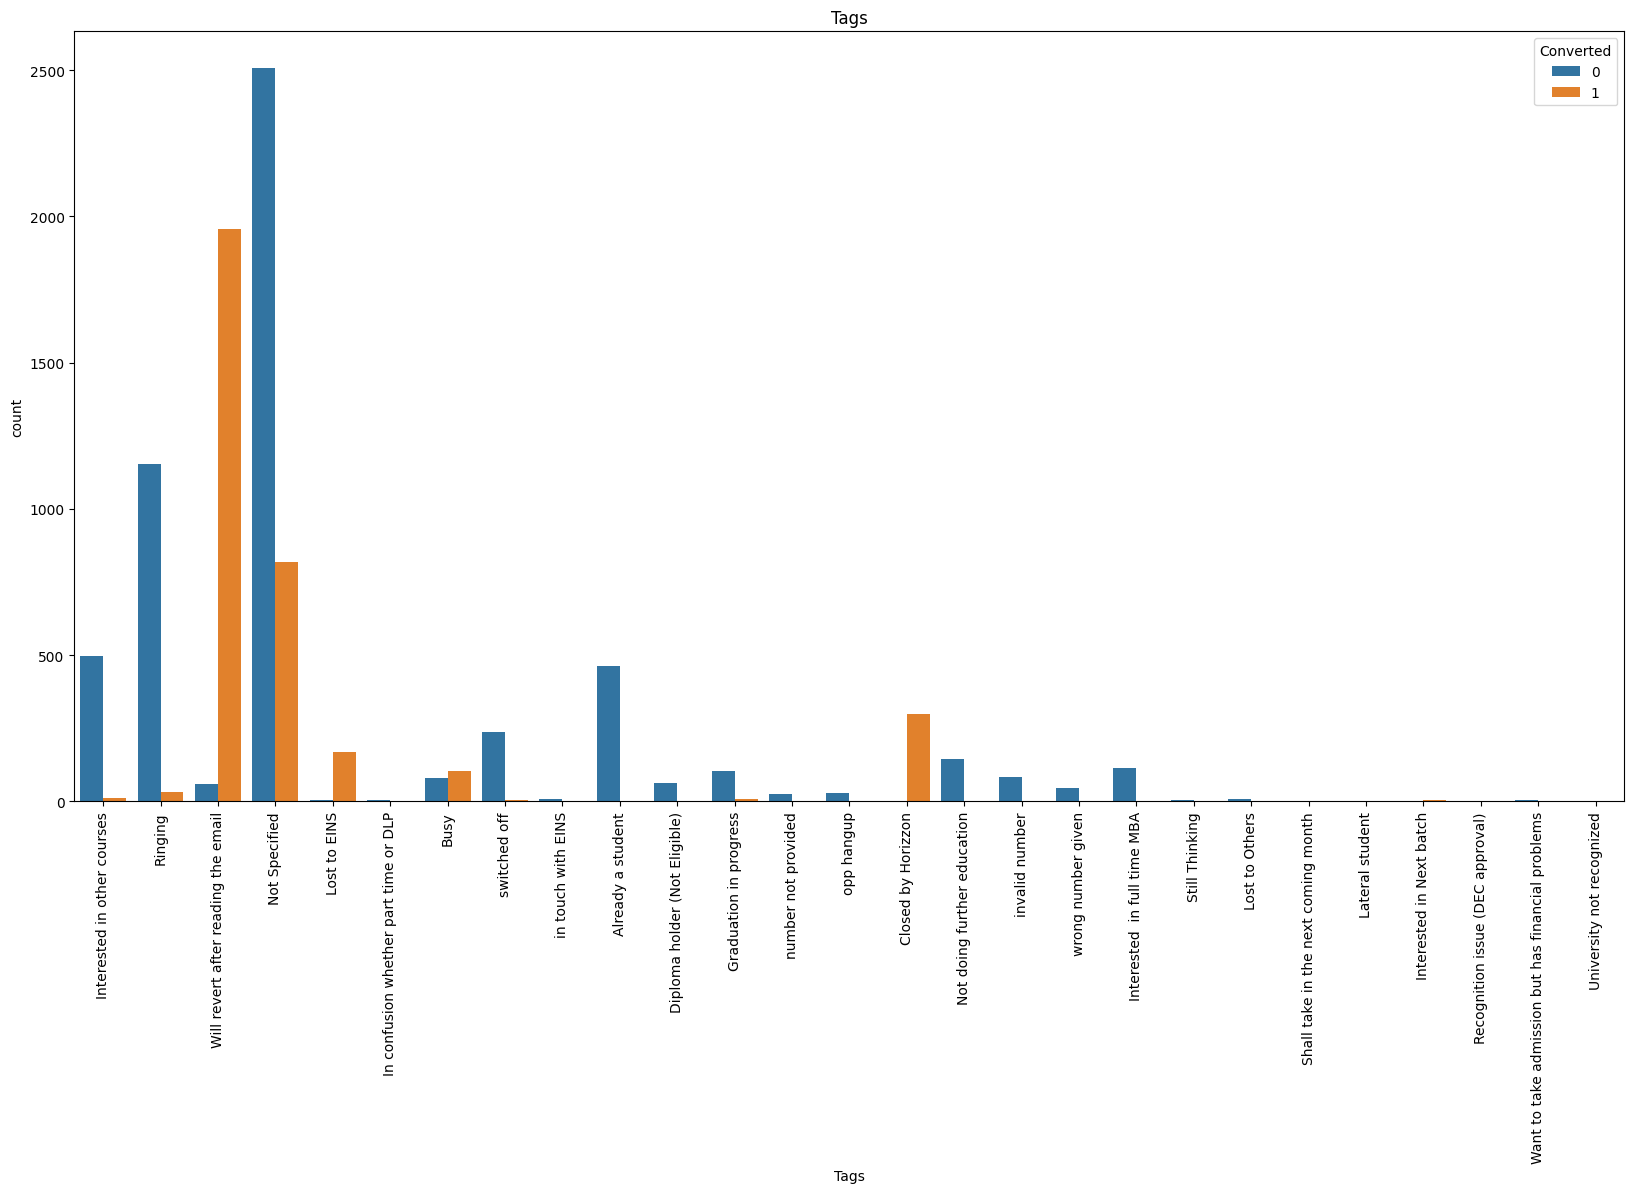

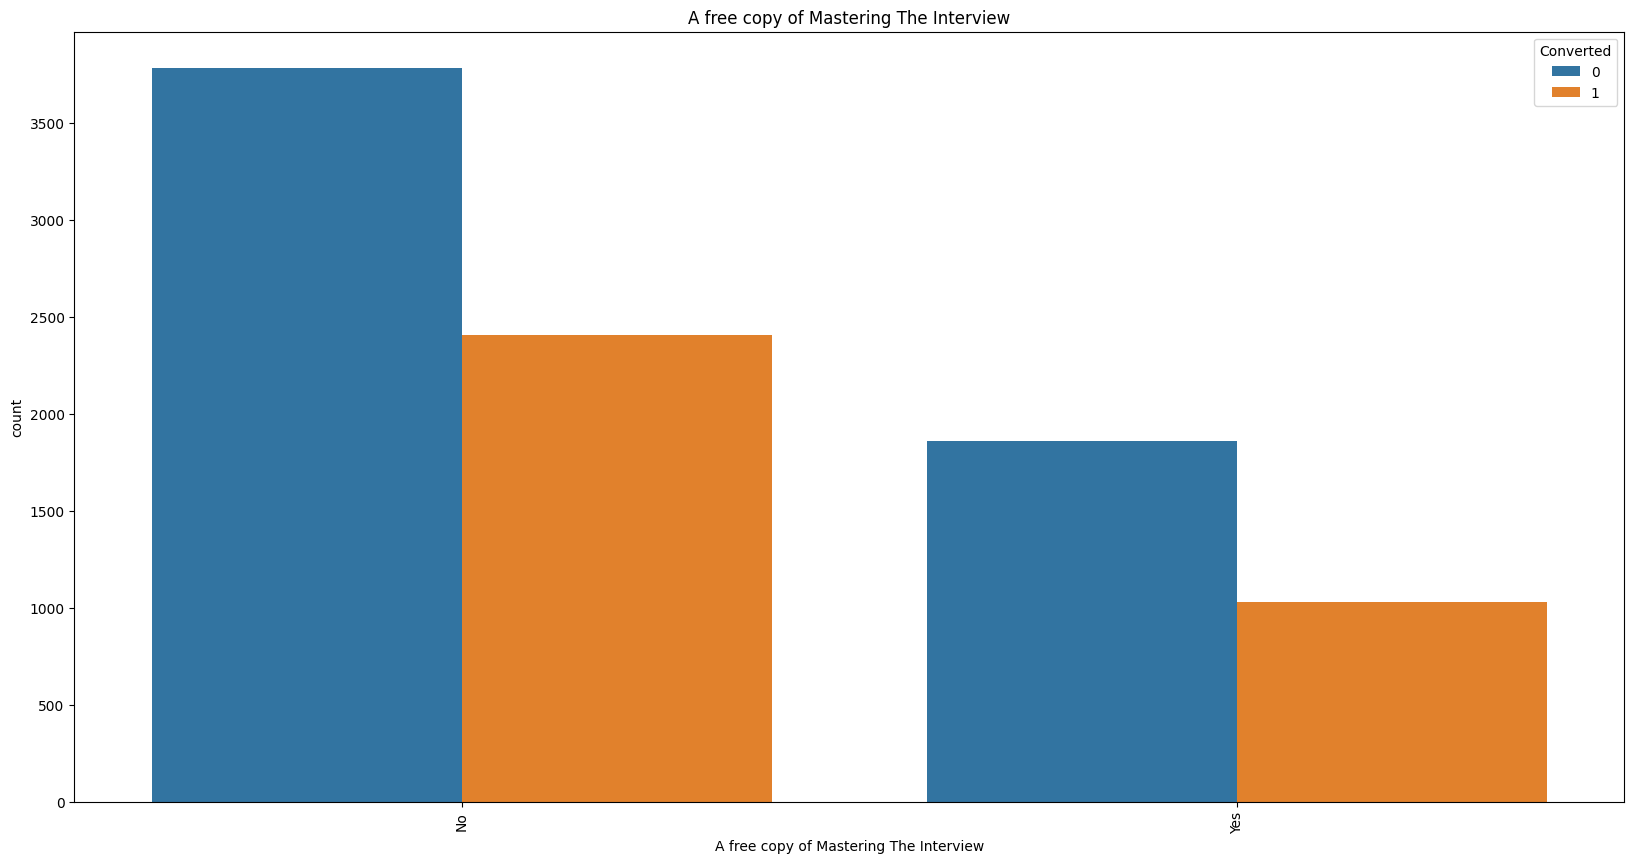

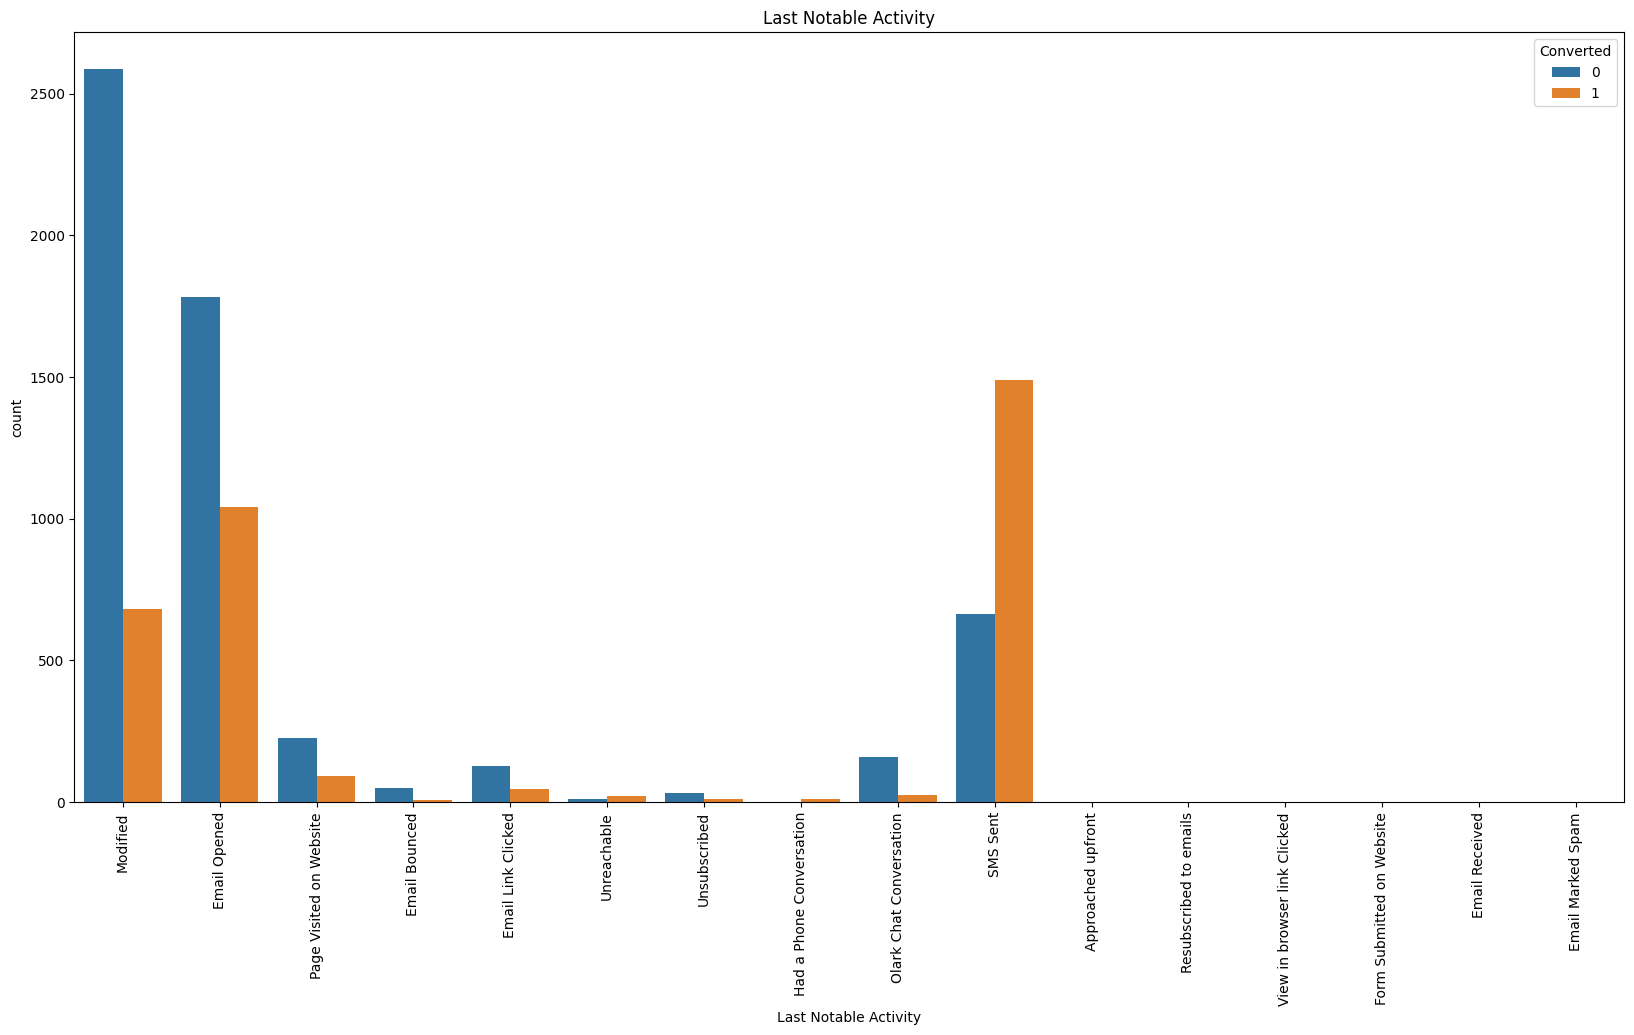

In [232]:
for col in categorical_columns:
    if col == 'Converted':
        continue
    plt.figure(figsize=[20, 10])
    sns.countplot(data=leads, x=col, hue='Converted')
    plt.title(col)
    plt.xticks(rotation=90)
    plt.show()

#### Insight

- if the last notable activity is SMS sent, then the chances are higher that the lead is converted. The opposite of this happened if the last notable activity is email sent or modified.
- If the free copy of Mastering the Interview is accepted, chances are higher that the lead is converted. The opposite happens if the offer is not accepted.
- If the tags are 'Will revert after reading the email' or 'Closed by Horizzon', there is a very high chance that the lead will convert. For the other tags, the chances for the lead not converting are higher. 
-  Working professional leads have a higher chance of converting. If the candidate is unemployed, there is a slight chance the lead will not convert.
- If the candidate has not specified there specialization, there is a high chance this lead will not convert.
- If the last activity is SMS sent, there is a very high chance the lead will convert. On the contray, if email sent was the last activity, there is a slight chance the lead will not convert.
-  There is a very low chance of the lead not converting if they opted for no email to be sent.
-  If the lead source is a recommendation, chances are they might convert.
- If the lead origin is the lead add form, chances are they might convert.

This concludes our EDA section. Lets move on to the model building section.

# Model Building

We begin this section by preprocessing the data to make it suitable for interpretation by the model.

## Data Preprocessing

Lets define a function through which we will convert the categorical variables to dummy variables.

In [233]:
def add_levels(data, var):
    levels = pd.get_dummies(data[var], drop_first=True) # Getting the dummy variables, dropping the first level for multicollinearity considerations
    for col in levels.columns:
        levels[col] = levels[col].astype('int') # This section is so that the dummy variables gotten will be of 'int' data type and not 'bool'
    levels.rename(columns={col: f'{var}_{col}' for col in levels.columns}, inplace=True) # renaming the columns for convenience
    data = pd.concat([data, levels], axis=1) # adding the levels to the dataframe
    data.drop(columns=var, inplace=True) # removing the original categorical variable
    return data

Lets apply this function to all the categorical variables. 

In [234]:
for var in categorical_columns:
    if var == 'Converted': # we are skipping this variable as this is the target variable.
        continue
    leads = add_levels(leads, var)
    
leads.head() # Checking 

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674.0,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532.0,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305.0,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428.0,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


## Train-Test Split

Lets split the data into training set and test set for model building and model evaluation respectively.

In [235]:
leads_test, leads_train  = train_test_split(leads, test_size=0.7, random_state=100)

Lets check the size of the datasets to confirm if the split was successful

In [236]:
leads_test.shape

(2722, 110)

In [237]:
leads_train.shape

(6352, 110)

## Scaling Data

Logistic Regression models are sensitive to data which does not have a standard normal distribution. So lets scale the numerical data with the help of StandardScaler from the sklearn library. 

In [238]:
scaler = StandardScaler()
leads_train[numeric_columns] = scaler.fit_transform(leads_train[numeric_columns]) # scaling the data 
leads_train.head() # checking if scaling was successful

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0.269831,-0.599494,0.940681,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1490,1,0.617775,1.865977,1.488294,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,0,-0.426055,-0.750404,-0.154545,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4216,1,-1.121942,-0.884951,-1.249770,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,0,1.661605,-0.586767,2.309714,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Feature Selection

In this section we will select 15 features from the list of features provided by using recursive feature elimination (RFE).
We will start by separating the target variables and features.

In [239]:
y_train = leads_train.pop('Converted')
X_train = leads_train

In [240]:
X_train.head() # Checking to see if split was successful

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0.269831,-0.599494,0.940681,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1490,0.617775,1.865977,1.488294,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,-0.426055,-0.750404,-0.154545,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4216,-1.121942,-0.884951,-1.249770,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,1.661605,-0.586767,2.309714,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We will be using the RFE utility of the scikit-learn library, which works only with the the LogisticRegression Class from that library. So lets declare an instance of that class and apply RFE  

In [241]:
logreg = LogisticRegression()

We fit the training data to the Logistic Regression of the scikit-learn library and apply the RFE

In [242]:
logreg.fit(X_train, y_train)
rfe = RFE(logreg, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

Lets take a look at the evaluation of each feature.

In [243]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 44),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 45),
 ('Lead Origin_Landing Page Submission', False, 34),
 ('Lead Origin_Lead Add Form', False, 5),
 ('Lead Origin_Lead Import', False, 81),
 ('Lead Source_Direct Traffic', False, 46),
 ('Lead Source_Facebook', False, 33),
 ('Lead Source_Google', False, 50),
 ('Lead Source_Live Chat', False, 89),
 ('Lead Source_NC_EDM', False, 91),
 ('Lead Source_Olark Chat', False, 7),
 ('Lead Source_Organic Search', False, 71),
 ('Lead Source_Pay per Click Ads', False, 88),
 ('Lead Source_Press_Release', False, 87),
 ('Lead Source_Reference', False, 80),
 ('Lead Source_Referral Sites', False, 51),
 ('Lead Source_Social Media', False, 65),
 ('Lead Source_WeLearn', False, 85),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 64),
 ('Lead Source_blog', False, 90),
 ('Lead Source_google', False, 43),
 ('Lead Source_testone', False, 94),
 ('Lead Source_welearnblog_Home', False,

Lets see which features have been selected.

In [244]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Not Specified', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Not Specified', 'Tags_Not doing further education',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified'],
      dtype='object')

The following features have not been selected.

In [245]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Acti

We conclude the feature selection section by modifying the feature data to contain only the selected features.

In [246]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Not Specified,Tags_Busy,Tags_Closed by Horizzon,Tags_Lateral student,Tags_Lost to EINS,Tags_Not Specified,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Last Notable Activity_Modified
3271,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1490,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7936,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3830,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


We will build our model with the statsmodel library. It requires us to add a column which has a constant 1 value. Lets proceed with that. 

In [247]:
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Not Specified,Tags_Busy,Tags_Closed by Horizzon,Tags_Lateral student,Tags_Lost to EINS,Tags_Not Specified,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Last Notable Activity_Modified
3271,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1490,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7936,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4216,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3830,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


We must remove all highly correlated features. For that we will need VIF of the feature data. To calculate that lets define a function.

In [248]:
def fetch_vif(data: pd.DataFrame):
    vif = pd.DataFrame() # Initializing the creating an empty dataframe
    vif["feature"] = data.columns # getting the features under a column
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))] # getting the corresponding VIF
    vif = vif.iloc[1:, :] # removing the constant column's VIF
    vif.sort_values(by='VIF', ascending=False, inplace=True) # sorting the data by VIF
    return vif

Our preparatory work is done. Lets proceed with the model building. 

## Model 1

In [249]:
lm1 = sm.GLM(y_train, X_train_rfe, family=sm.families.Binomial())
lm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6352
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1275.0
Date:                Sun, 17 Sep 2023   Deviance:                       2550.0
Time:                        21:13:25   Pearson chi2:                 1.32e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6012
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.0771      0.194    -15.839      0.000      -3.458      -2.696
Lead Source_Welingak Website                      2.6465      1.025      2.583      0.010       0.638       4.655
Last Activity_SMS Sent                            2.0988      0.119     17.602      0.000       1.865       2.333
What is your current occupation_Not Specified    -2.5271      0.143    -17.698      0.000      -2.807      -2.247
Tags_Busy                                         2.6247      0.278      9.432      0.000       2.079       3.170
Tags_Closed by Horizzon                           9.3093      1.024      9.090      0.000       7.302      11.316
Tags_Lateral student                             27.6946   1.22e+05      0.000      1.000   -2.39e+05    2.39e+05
Tags_Lost to EINS                                 8.9167      0.580     15.373      0.000       7.780      10.053
Tags_Not Specified                                3.4409      0.221     15.553      0.000       3.007       3.875
Tags_Not doing further education                -21.9122   2.03e+04     -0.001      0.999   -3.98e+04    3.98e+04
Tags_Ringing                                     -1.5026      0.289     -5.196      0.000      -2.069      -0.936
Tags_Will revert after reading the email          6.3933      0.250     25.597      0.000       5.904       6.883
Tags_invalid number                              -2.0111      1.041     -1.932      0.053      -4.051       0.029
Tags_switched off                                -2.1945      0.623     -3.524      0.000      -3.415      -0.974
Tags_wrong number given                         -23.5199   3.23e+04     -0.001      0.999   -6.33e+04    6.32e+04
Last Notable Activity_Modified                   -1.4974      0.123    -12.149      0.000      -1.739      -1.256
=================================================================================================================
"""

In [250]:
fetch_vif(X_train_rfe)

,feature,VIF
8,Tags_Not Specified,4.603206
3,What is your current occupation_Not Specified,3.334947
11,Tags_Will revert after reading the email,2.240774
10,Tags_Ringing,1.744093
5,Tags_Closed by Horizzon,1.184319
13,Tags_switched off,1.170692
2,Last Activity_SMS Sent,1.169092
15,Last Notable Activity_Modified,1.168525
4,Tags_Busy,1.161210
7,Tags_Lost to EINS,1.134267


Tags_Lateral student has a very high p-value, hence it will be dropped.

In [251]:
X_train_rfe.drop(columns='Tags_Lateral student', inplace=True)

## Model 2

In [252]:
lm2 = sm.GLM(y_train, X_train_rfe, family=sm.families.Binomial())
lm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6352
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1281.3
Date:                Sun, 17 Sep 2023   Deviance:                       2562.5
Time:                        21:13:25   Pearson chi2:                 1.33e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6005
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.0014      0.187    -16.043      0.000      -3.368      -2.635
Lead Source_Welingak Website                      2.6447      1.025      2.581      0.010       0.636       4.653
Last Activity_SMS Sent                            2.1236      0.119     17.838      0.000       1.890       2.357
What is your current occupation_Not Specified    -2.5341      0.143    -17.717      0.000      -2.814      -2.254
Tags_Busy                                         2.5329      0.273      9.265      0.000       1.997       3.069
Tags_Closed by Horizzon                           9.2212      1.023      9.017      0.000       7.217      11.225
Tags_Lost to EINS                                 8.8338      0.578     15.295      0.000       7.702       9.966
Tags_Not Specified                                3.3573      0.215     15.627      0.000       2.936       3.778
Tags_Not doing further education                -21.9997   2.03e+04     -0.001      0.999   -3.98e+04    3.98e+04
Tags_Ringing                                     -1.5991      0.284     -5.625      0.000      -2.156      -1.042
Tags_Will revert after reading the email          6.3081      0.244     25.854      0.000       5.830       6.786
Tags_invalid number                              -2.1086      1.039     -2.029      0.042      -4.146      -0.071
Tags_switched off                                -2.2927      0.620     -3.695      0.000      -3.509      -1.077
Tags_wrong number given                         -23.6165   3.22e+04     -0.001      0.999   -6.32e+04    6.32e+04
Last Notable Activity_Modified                   -1.4829      0.123    -12.097      0.000      -1.723      -1.243
=================================================================================================================
"""

In [253]:
fetch_vif(X_train_rfe)

,feature,VIF
7,Tags_Not Specified,4.597010
3,What is your current occupation_Not Specified,3.334941
10,Tags_Will revert after reading the email,2.234821
9,Tags_Ringing,1.740855
5,Tags_Closed by Horizzon,1.183661
12,Tags_switched off,1.169889
14,Last Notable Activity_Modified,1.168455
2,Last Activity_SMS Sent,1.166406
4,Tags_Busy,1.160398
6,Tags_Lost to EINS,1.133796


Tags_Not doing further education has a very high p-value, hence it will be dropped.

In [254]:
X_train_rfe.drop(columns='Tags_Not doing further education', inplace=True)

## Model 3

In [255]:
lm3 = sm.GLM(y_train, X_train_rfe, family=sm.families.Binomial())
lm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6352
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1284.2
Date:                Sun, 17 Sep 2023   Deviance:                       2568.4
Time:                        21:13:25   Pearson chi2:                 1.34e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6001
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.0929      0.186    -16.592      0.000      -3.458      -2.728
Lead Source_Welingak Website                      2.6438      1.025      2.580      0.010       0.635       4.652
Last Activity_SMS Sent                            2.1255      0.119     17.855      0.000       1.892       2.359
What is your current occupation_Not Specified    -2.5346      0.143    -17.714      0.000      -2.815      -2.254
Tags_Busy                                         2.6243      0.273      9.617      0.000       2.089       3.159
Tags_Closed by Horizzon                           9.3158      1.022      9.111      0.000       7.312      11.320
Tags_Lost to EINS                                 8.9290      0.577     15.467      0.000       7.797      10.060
Tags_Not Specified                                3.4494      0.214     16.105      0.000       3.030       3.869
Tags_Ringing                                     -1.5091      0.284     -5.317      0.000      -2.065      -0.953
Tags_Will revert after reading the email          6.4012      0.243     26.305      0.000       5.924       6.878
Tags_invalid number                              -2.0185      1.039     -1.942      0.052      -4.055       0.019
Tags_switched off                                -2.2028      0.620     -3.552      0.000      -3.418      -0.987
Tags_wrong number given                         -21.5262   1.19e+04     -0.002      0.999   -2.33e+04    2.32e+04
Last Notable Activity_Modified                   -1.4868      0.123    -12.133      0.000      -1.727      -1.247
=================================================================================================================
"""

In [256]:
fetch_vif(X_train_rfe)

,feature,VIF
7,Tags_Not Specified,4.470013
3,What is your current occupation_Not Specified,3.334156
9,Tags_Will revert after reading the email,2.132772
8,Tags_Ringing,1.672130
13,Last Notable Activity_Modified,1.167900
2,Last Activity_SMS Sent,1.166396
5,Tags_Closed by Horizzon,1.163758
11,Tags_switched off,1.154750
4,Tags_Busy,1.147505
6,Tags_Lost to EINS,1.122169


Tags_wrong number given has a very high p-value, hence it will be dropped.

In [257]:
X_train_rfe.drop(columns='Tags_wrong number given', inplace=True)

## Model 4

In [258]:
lm4 = sm.GLM(y_train, X_train_rfe, family=sm.families.Binomial())
lm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6352
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1288.9
Date:                Sun, 17 Sep 2023   Deviance:                       2577.8
Time:                        21:13:25   Pearson chi2:                 1.31e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5995
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.2224      0.188    -17.179      0.000      -3.590      -2.855
Lead Source_Welingak Website                      2.6514      1.025      2.588      0.010       0.643       4.659
Last Activity_SMS Sent                            2.0928      0.118     17.749      0.000       1.862       2.324
What is your current occupation_Not Specified    -2.5254      0.142    -17.727      0.000      -2.805      -2.246
Tags_Busy                                         2.7670      0.272     10.179      0.000       2.234       3.300
Tags_Closed by Horizzon                           9.4329      1.023      9.222      0.000       7.428      11.438
Tags_Lost to EINS                                 9.0383      0.578     15.636      0.000       7.905      10.171
Tags_Not Specified                                3.5805      0.215     16.669      0.000       3.159       4.001
Tags_Ringing                                     -1.3534      0.282     -4.803      0.000      -1.906      -0.801
Tags_Will revert after reading the email          6.5271      0.244     26.703      0.000       6.048       7.006
Tags_invalid number                              -1.8623      1.039     -1.793      0.073      -3.898       0.173
Tags_switched off                                -2.0448      0.619     -3.303      0.001      -3.258      -0.831
Last Notable Activity_Modified                   -1.4710      0.122    -12.021      0.000      -1.711      -1.231
=================================================================================================================
"""

In [259]:
fetch_vif(X_train_rfe)

,feature,VIF
7,Tags_Not Specified,4.411886
3,What is your current occupation_Not Specified,3.334094
9,Tags_Will revert after reading the email,2.080877
8,Tags_Ringing,1.641149
12,Last Notable Activity_Modified,1.165934
2,Last Activity_SMS Sent,1.162293
5,Tags_Closed by Horizzon,1.157335
11,Tags_switched off,1.147708
4,Tags_Busy,1.140976
6,Tags_Lost to EINS,1.118210


Tags_invalid number has a high p-value, hence it will be dropped.

In [260]:
X_train_rfe.drop(columns='Tags_invalid number', inplace=True)

## Model 5

In [261]:
lm5 = sm.GLM(y_train, X_train_rfe, family=sm.families.Binomial())
lm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6352
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1291.7
Date:                Sun, 17 Sep 2023   Deviance:                       2583.3
Time:                        21:13:25   Pearson chi2:                 1.29e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5991
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.3456      0.186    -17.954      0.000      -3.711      -2.980
Lead Source_Welingak Website                      2.6575      1.024      2.594      0.009       0.650       4.665
Last Activity_SMS Sent                            2.0679      0.117     17.668      0.000       1.838       2.297
What is your current occupation_Not Specified    -2.5184      0.142    -17.738      0.000      -2.797      -2.240
Tags_Busy                                         2.9000      0.269     10.768      0.000       2.372       3.428
Tags_Closed by Horizzon                           9.5456      1.023      9.332      0.000       7.541      11.551
Tags_Lost to EINS                                 9.1453      0.578     15.819      0.000       8.012      10.278
Tags_Not Specified                                3.7046      0.213     17.360      0.000       3.286       4.123
Tags_Ringing                                     -1.2104      0.278     -4.349      0.000      -1.756      -0.665
Tags_Will revert after reading the email          6.6470      0.244     27.271      0.000       6.169       7.125
Tags_switched off                                -1.9001      0.617     -3.077      0.002      -3.110      -0.690
Last Notable Activity_Modified                   -1.4579      0.122    -11.924      0.000      -1.697      -1.218
=================================================================================================================
"""

In [262]:
fetch_vif(X_train_rfe)

,feature,VIF
7,Tags_Not Specified,4.333074
3,What is your current occupation_Not Specified,3.334065
9,Tags_Will revert after reading the email,2.011814
8,Tags_Ringing,1.598998
11,Last Notable Activity_Modified,1.163417
2,Last Activity_SMS Sent,1.159145
5,Tags_Closed by Horizzon,1.148197
10,Tags_switched off,1.138234
4,Tags_Busy,1.132345
6,Tags_Lost to EINS,1.112689


Lead Source_Welingak Website has a high p-value, hence it will be dropped.

In [263]:
X_train_rfe.drop(columns='Lead Source_Welingak Website', inplace=True)

## Model 6

In [264]:
lm6 = sm.GLM(y_train, X_train_rfe, family=sm.families.Binomial())
lm6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6352
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1299.5
Date:                Sun, 17 Sep 2023   Deviance:                       2599.1
Time:                        21:13:25   Pearson chi2:                 1.36e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5982
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.3517      0.187    -17.967      0.000      -3.717      -2.986
Last Activity_SMS Sent                            2.0956      0.116     17.997      0.000       1.867       2.324
What is your current occupation_Not Specified    -2.6326      0.139    -18.936      0.000      -2.905      -2.360
Tags_Busy                                         2.8966      0.270     10.730      0.000       2.367       3.426
Tags_Closed by Horizzon                           9.6086      1.023      9.393      0.000       7.604      11.613
Tags_Lost to EINS                                 9.2664      0.579     16.005      0.000       8.132      10.401
Tags_Not Specified                                3.8179      0.212     18.041      0.000       3.403       4.233
Tags_Ringing                                     -1.2261      0.278     -4.403      0.000      -1.772      -0.680
Tags_Will revert after reading the email          6.6650      0.244     27.299      0.000       6.186       7.143
Tags_switched off                                -1.9178      0.618     -3.106      0.002      -3.128      -0.707
Last Notable Activity_Modified                   -1.4784      0.122    -12.134      0.000      -1.717      -1.240
=================================================================================================================
"""

In [265]:
fetch_vif(X_train_rfe)

,feature,VIF
6,Tags_Not Specified,4.142400
2,What is your current occupation_Not Specified,3.154389
8,Tags_Will revert after reading the email,2.011330
7,Tags_Ringing,1.598428
10,Last Notable Activity_Modified,1.163350
1,Last Activity_SMS Sent,1.152667
4,Tags_Closed by Horizzon,1.140592
9,Tags_switched off,1.138051
3,Tags_Busy,1.132083
5,Tags_Lost to EINS,1.108282


All VIF values anf p-values are in acceptable ranges, thus we will conclude our model building here

# Model Evaluation

In [266]:
res = lm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6352
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1299.5
Date:                Sun, 17 Sep 2023   Deviance:                       2599.1
Time:                        21:13:26   Pearson chi2:                 1.36e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5982
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.3517      0.187    -17.967      0.000      -3.717      -2.986
Last Activity_SMS Sent                            2.0956      0.116     17.997      0.000       1.867       2.324
What is your current occupation_Not Specified    -2.6326      0.139    -18.936      0.000      -2.905      -2.360
Tags_Busy                                         2.8966      0.270     10.730      0.000       2.367       3.426
Tags_Closed by Horizzon                           9.6086      1.023      9.393      0.000       7.604      11.613
Tags_Lost to EINS                                 9.2664      0.579     16.005      0.000       8.132      10.401
Tags_Not Specified                                3.8179      0.212     18.041      0.000       3.403       4.233
Tags_Ringing                                     -1.2261      0.278     -4.403      0.000      -1.772      -0.680
Tags_Will revert after reading the email          6.6650      0.244     27.299      0.000       6.186       7.143
Tags_switched off                                -1.9178      0.618     -3.106      0.002      -3.128      -0.707
Last Notable Activity_Modified                   -1.4784      0.122    -12.134      0.000      -1.717      -1.240
=================================================================================================================
"""

In [267]:
y_train_pred = res.predict(X_train_rfe).values.reshape(-1)
y_train_pred[:10]

array([0.10280471, 0.96487945, 0.10280471, 0.99166186, 0.10280471,
       0.96487945, 0.07711616, 0.00511973, 0.99554323, 0.17520911])

In [268]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.102805,3271
1,1,0.964879,1490
2,0,0.102805,7936
3,1,0.991662,4216
4,0,0.102805,3830


In [269]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.102805,3271,0
1,1,0.964879,1490,1
2,0,0.102805,7936,0
3,1,0.991662,4216,1
4,0,0.102805,3830,0


In [270]:
confusion = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3825  159]
 [ 329 2039]]


In [271]:
print(accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9231738035264484


In [272]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [273]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8610641891891891

In [274]:
# Let us calculate specificity
TN / float(TN+FP)

0.9600903614457831

In [275]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.039909638554216864


In [276]:
# positive predictive value 
print (TP / float(TP+FP))

0.9276615104640582


In [277]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

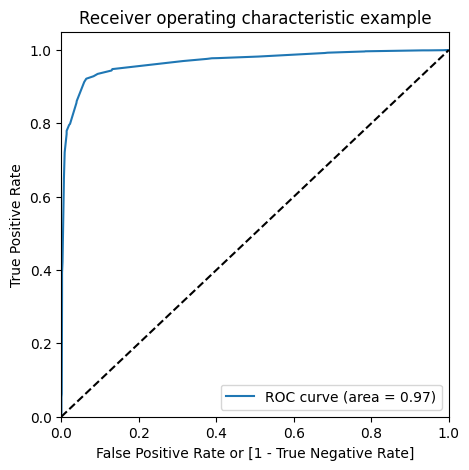

In [278]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [279]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.102805,3271,0,1,1,0,0,0,0,0,0,0,0
1,1,0.964879,1490,1,1,1,1,1,1,1,1,1,1,1
2,0,0.102805,7936,0,1,1,0,0,0,0,0,0,0,0
3,1,0.991662,4216,1,1,1,1,1,1,1,1,1,1,1
4,0,0.102805,3830,0,1,1,0,0,0,0,0,0,0,0


In [280]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.372796,1.000000,0.000000
0.1,0.1,0.791877,0.970017,0.685994
0.2,0.2,0.916877,0.934966,0.906124
0.3,0.3,0.930416,0.921875,0.935492
0.4,0.4,0.930416,0.913007,0.940763
0.5,0.5,0.923174,0.861064,0.960090
0.6,0.6,0.921757,0.855997,0.960843
0.7,0.7,0.910737,0.798564,0.977410
0.8,0.8,0.911209,0.796030,0.979669
0.9,0.9,0.890586,0.721284,0.991215


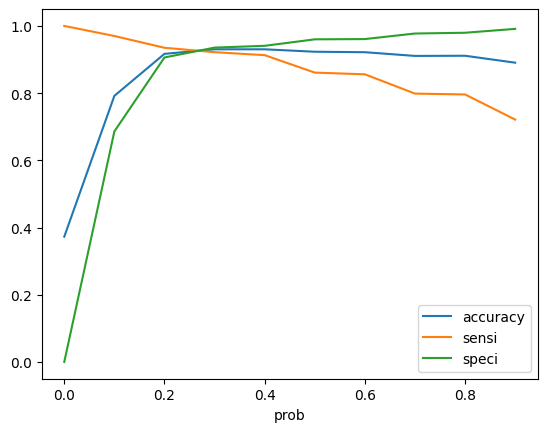

In [281]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [282]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.102805,3271,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.964879,1490,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.102805,7936,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.991662,4216,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.102805,3830,0,1,1,0,0,0,0,0,0,0,0,0


In [283]:
# Let's check the overall accuracy.
accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.9304156171284634

In [284]:
confusion2 = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[3727,  257],
       [ 185, 2183]], dtype=int64)

In [285]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [286]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.921875

In [287]:
# Let us calculate specificity
TN / float(TN+FP)

0.9354919678714859

In [288]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.06450803212851405


In [289]:
# Positive predictive value 
print (TP / float(TP+FP))

0.894672131147541


In [290]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.9276615104640582

In [291]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8610641891891891

Prediction on test values

In [292]:
leads_test.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7076,1,2.0,84.0,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1042,0,0.0,0.0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8698,0,1.0,456.0,1.00,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
9239,1,6.0,1279.0,3.00,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8349,0,4.0,1224.0,1.33,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [293]:
y_test = leads_test.pop('Converted')
X_test = leads_test

In [294]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7076,2.0,84.0,2.00,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1042,0.0,0.0,0.00,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8698,1.0,456.0,1.00,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
9239,6.0,1279.0,3.00,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8349,4.0,1224.0,1.33,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [295]:
numeric_columns

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [296]:
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7076,-0.426055,-0.732223,-0.154545,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1042,-1.121942,-0.884951,-1.249770,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8698,-0.773999,-0.055854,-0.702158,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
9239,0.965718,1.440520,0.393068,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8349,0.269831,1.340519,-0.521445,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [297]:
X_test = sm.add_constant(X_test)
X_test.head()

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7076,1.0,-0.426055,-0.732223,-0.154545,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1042,1.0,-1.121942,-0.884951,-1.249770,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8698,1.0,-0.773999,-0.055854,-0.702158,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
9239,1.0,0.965718,1.440520,0.393068,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8349,1.0,0.269831,1.340519,-0.521445,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [298]:
X_test = X_test[X_train_rfe.columns]
X_test.head()

,const,Last Activity_SMS Sent,What is your current occupation_Not Specified,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Modified
7076,1.0,1,0,0,0,0,0,0,1,0,0
1042,1.0,0,1,0,0,0,1,0,0,0,1
8698,1.0,0,0,0,0,0,0,0,0,0,1
9239,1.0,1,0,0,0,0,0,0,1,0,1
8349,1.0,0,1,0,0,0,1,0,0,0,0


In [299]:
y_test_pred = res.predict(X_test).values.reshape(-1)
y_test_pred[:10]

array([0.99554323, 0.0254615 , 0.00792255, 0.98074439, 0.10280471,
       0.01017256, 0.07711616, 0.0254615 , 0.01017256, 0.10280471])

In [300]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index
y_test_pred_final.head()

,Churn,Churn_Prob,CustID
0,1,0.995543,7076
1,0,0.025462,1042
2,0,0.007923,8698
3,1,0.980744,9239
4,0,0.102805,8349


In [301]:
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_test_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,1,0.995543,7076,1
1,0,0.025462,1042,0
2,0,0.007923,8698,0
3,1,0.980744,9239,1
4,0,0.102805,8349,0


In [302]:
confusion_test = confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion_test)

[[1541  114]
 [  79  988]]


In [303]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [304]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9259606373008434

In [305]:
# Let us calculate specificity
TN / float(TN+FP)

0.9311178247734139

In [306]:
# Calculate false positive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0688821752265861


In [307]:
# Positive predictive value 
print (TP / float(TP+FP))

0.896551724137931


In [308]:
accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)

0.9290962527553269

In [309]:
precision_score(y_test_pred_final.Churn, y_test_pred_final.predicted)

0.896551724137931

In [310]:
recall_score(y_test_pred_final.Churn, y_test_pred_final.predicted)

0.9259606373008434

In [311]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_test_pred_final.loc[y_test_pred_final['Churn']==1,['Churn','predicted']]
checking_test_df['predicted'].value_counts()

predicted
1    988
0     79
Name: count, dtype: int64

In [312]:
# check the precentage of final_predicted conversions on test data

988/float(988+79)

0.9259606373008434